In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Lemma 1 - Service Times
stmixed_10 = np.array([ 1.475, 1.425, 1.450])
stmixed_13 = np.array([ 1.050, 0.975, 1.025])
stmixed_17 = np.array([ 0.800, 0.713, 0.740])
stmixed_20 = np.array([ 0.618, 0.625, 0.683])
stmixed_23 = np.array([ 0.615, 0.633, 0.590])
stmixed_26 = np.array([ 0.523, 0.533, 0.548])

stmixed_10_energy = np.array([ 25.13, 24.81, 24.96])
stmixed_13_energy = np.array([ 24.27, 23.50 ])
stmixed_17_energy = np.array([ 23.61, 23.5, 23.00])
stmixed_20_energy = np.array([ 21.88, 21.99, 21.95])
stmixed_23_energy = np.array([ 22.59, 23.99, 22.15])
stmixed_26_energy = np.array([ 26.08, 25.68, 26.04])

No handles with labels found to put in legend.
No handles with labels found to put in legend.


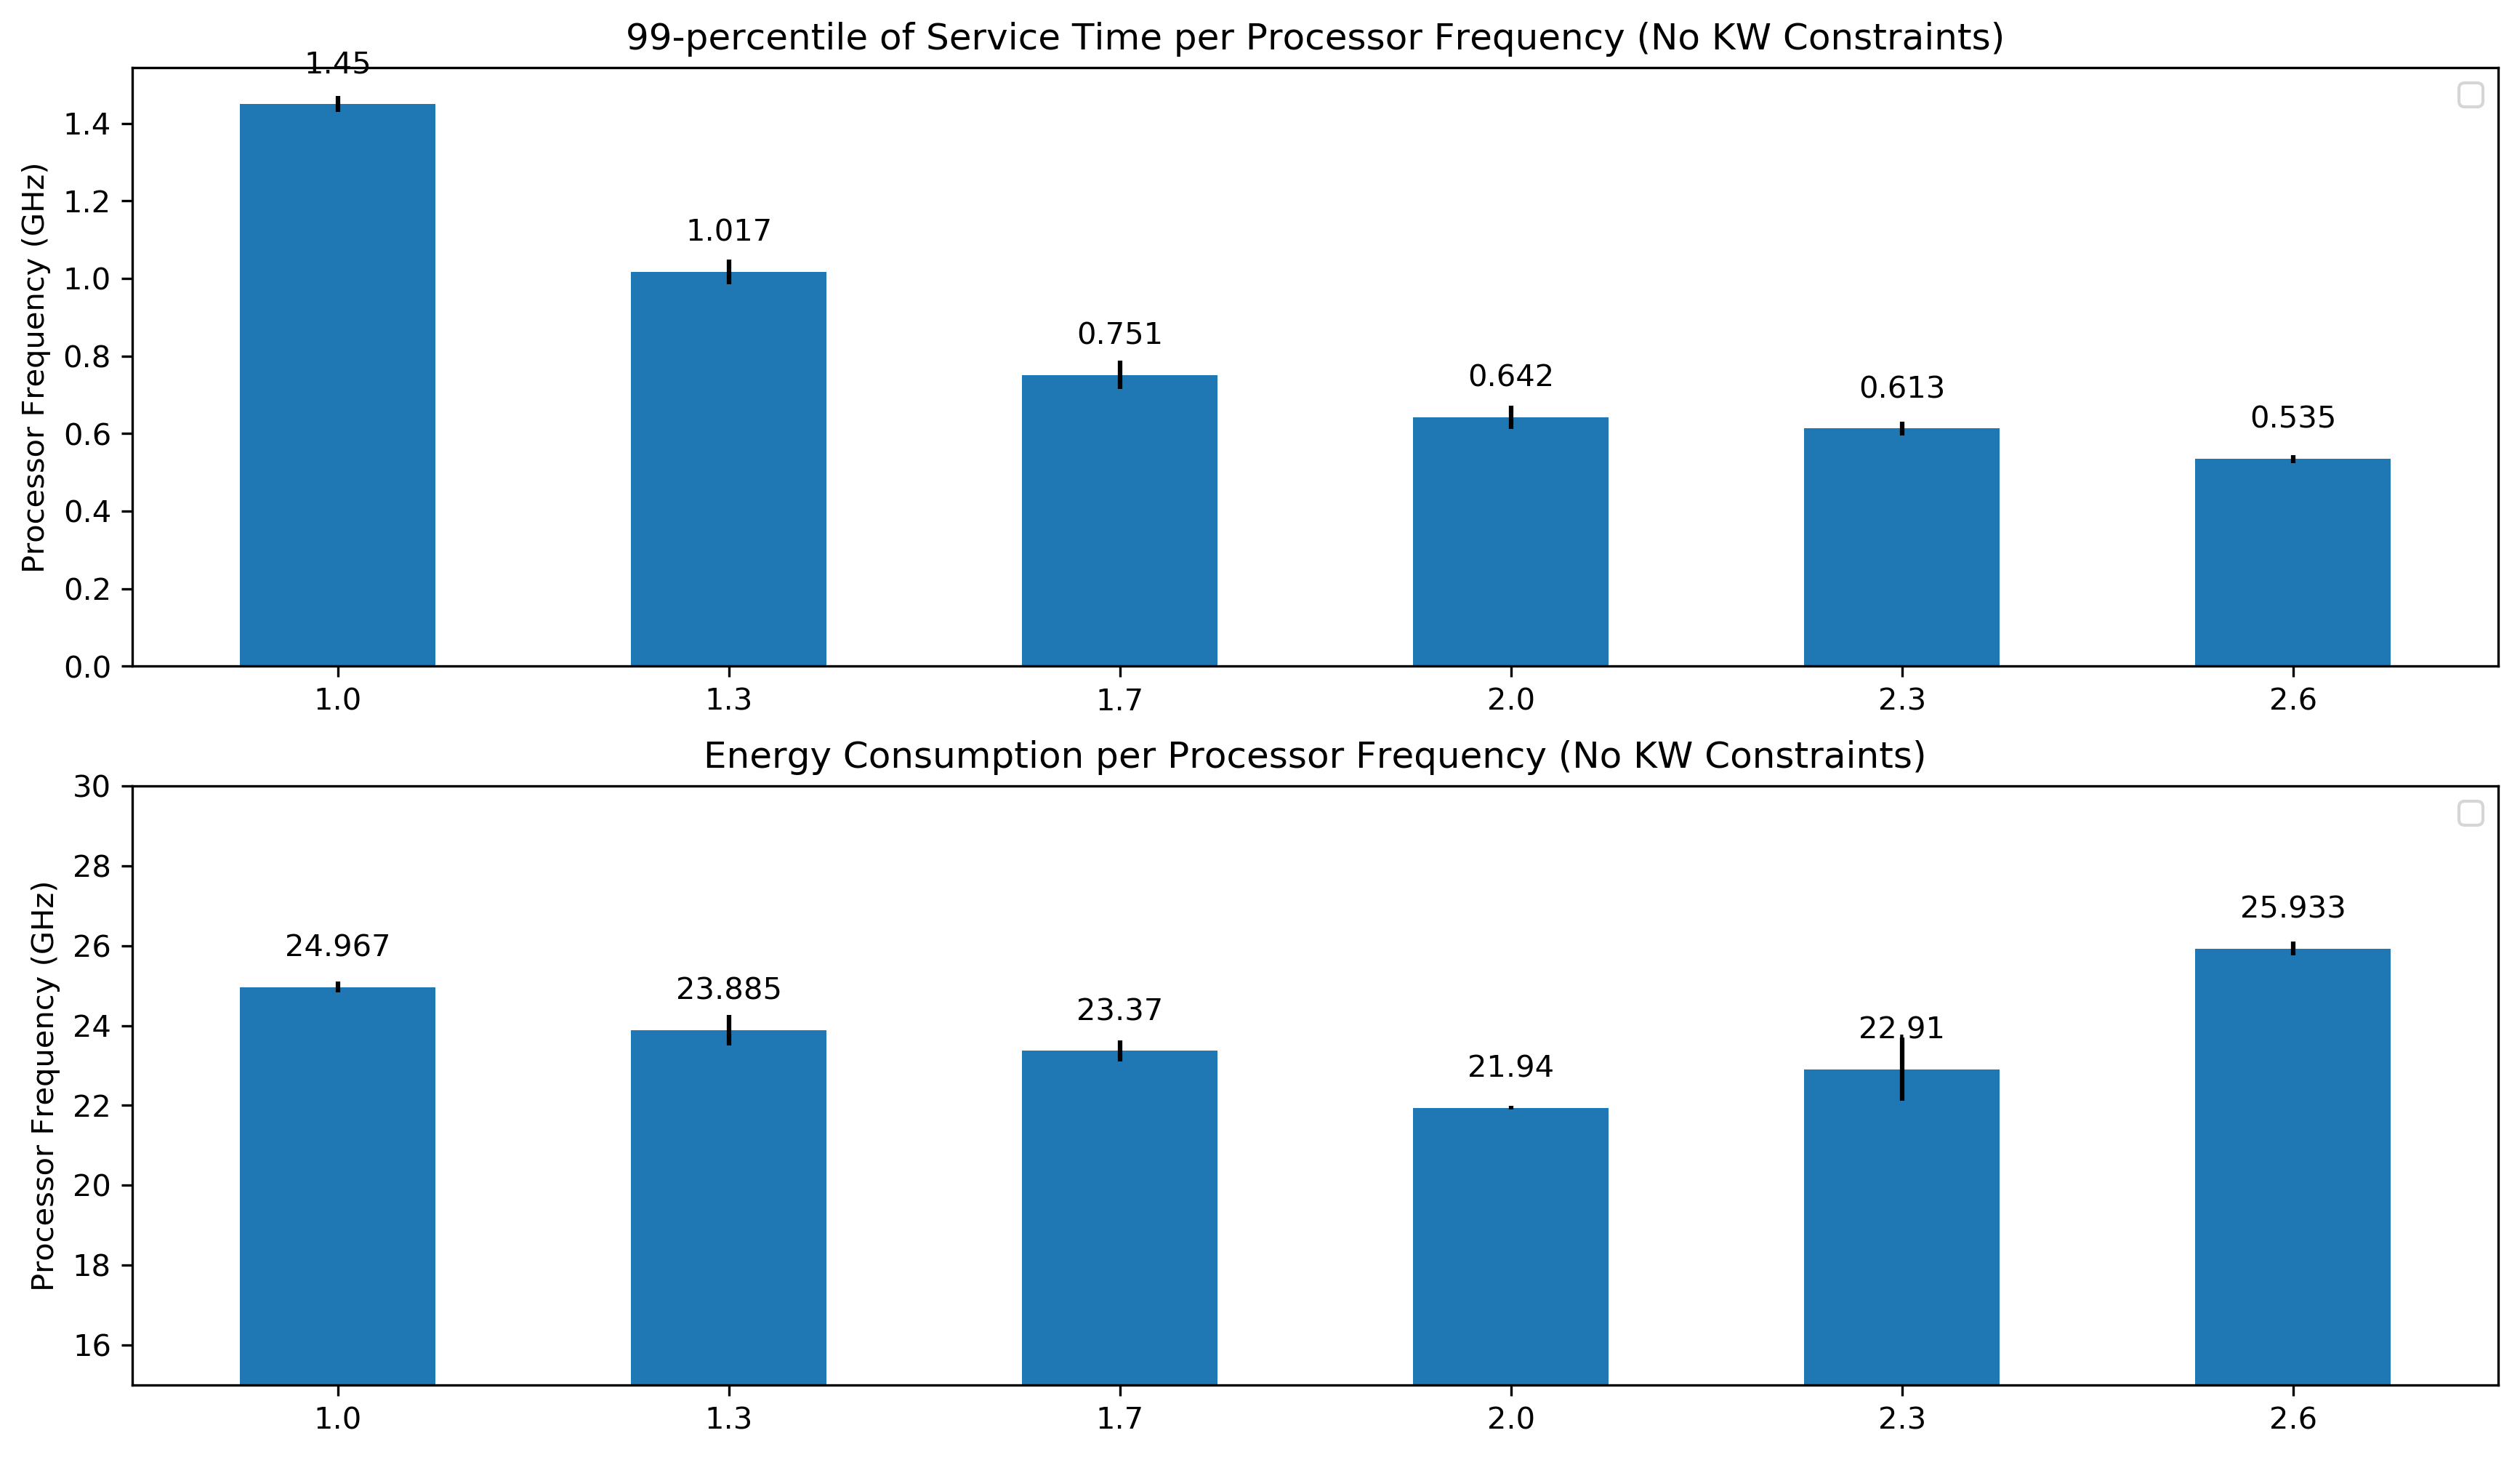

In [14]:
#fig, ax = plt.subplots(figsize=(18,20), dpi=300)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 8),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
labels = ['1.0', '1.3', '1.7', '2.0', '2.3', '2.6']
men_means = [stmixed_10.mean(), stmixed_13.mean(), stmixed_17.mean(), stmixed_20.mean(), stmixed_23.mean(), stmixed_26.mean()]
men_std = [stmixed_10.std(), stmixed_13.std(), stmixed_17.std(), stmixed_20.std(), stmixed_23.std(), stmixed_26.std()]
men_means = np.round(men_means, 3)

men_means_energy = [stmixed_10_energy.mean(), stmixed_13_energy.mean(), stmixed_17_energy.mean(), stmixed_20_energy.mean(), stmixed_23_energy.mean(), stmixed_26_energy.mean()]
men_std_energy = [stmixed_10_energy.std(), stmixed_13_energy.std(), stmixed_17_energy.std(), stmixed_20_energy.std(), stmixed_23_energy.std(), stmixed_26_energy.std()]
men_means_energy = np.round(men_means_energy, 3)

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, axs = plt.subplots(2, 1, figsize=(14,8), dpi=300)
ax = axs[0]
rects1 = ax.bar(x, men_means, width, yerr=men_std)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Service Time (s)')
ax.set_ylabel('Processor Frequency (GHz)')

ax.set_title('99-percentile of Service Time per Processor Frequency (No KW Constraints)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
autolabel(rects1)

ax.legend()

ax = axs[1]
rects2 = ax.bar(x, men_means_energy, width, yerr=men_std_energy)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Energy Consumption (kJ)')
ax.set_ylabel('Processor Frequency (GHz)')

ax.set_title('Energy Consumption per Processor Frequency (No KW Constraints)')
ax.set_xticks(x)
ax.set_ylim(15,30)
ax.set_xticklabels(labels)
ax.legend()
autolabel(rects2)

#fig.tight_layout()

plt.show()
fig.savefig('D:\\elastic-hurryup\\graphs\\processor_frequencies.png')

In [22]:
# Lemma 2 - Energy Consumption
stmixed_10_low = np.array([ 0.340, 0.418, 0.383]) # Rerun? Agents = 8, Time = 10 mins / 600s
stmixed_10_high = np.array([ 2.475, 2.475, 2.475])
stmixed_26_low = np.array([ 0.208, 0.190, 0.208])
stmixed_26_high = np.array([ 1.450, 1.450, 1.500])

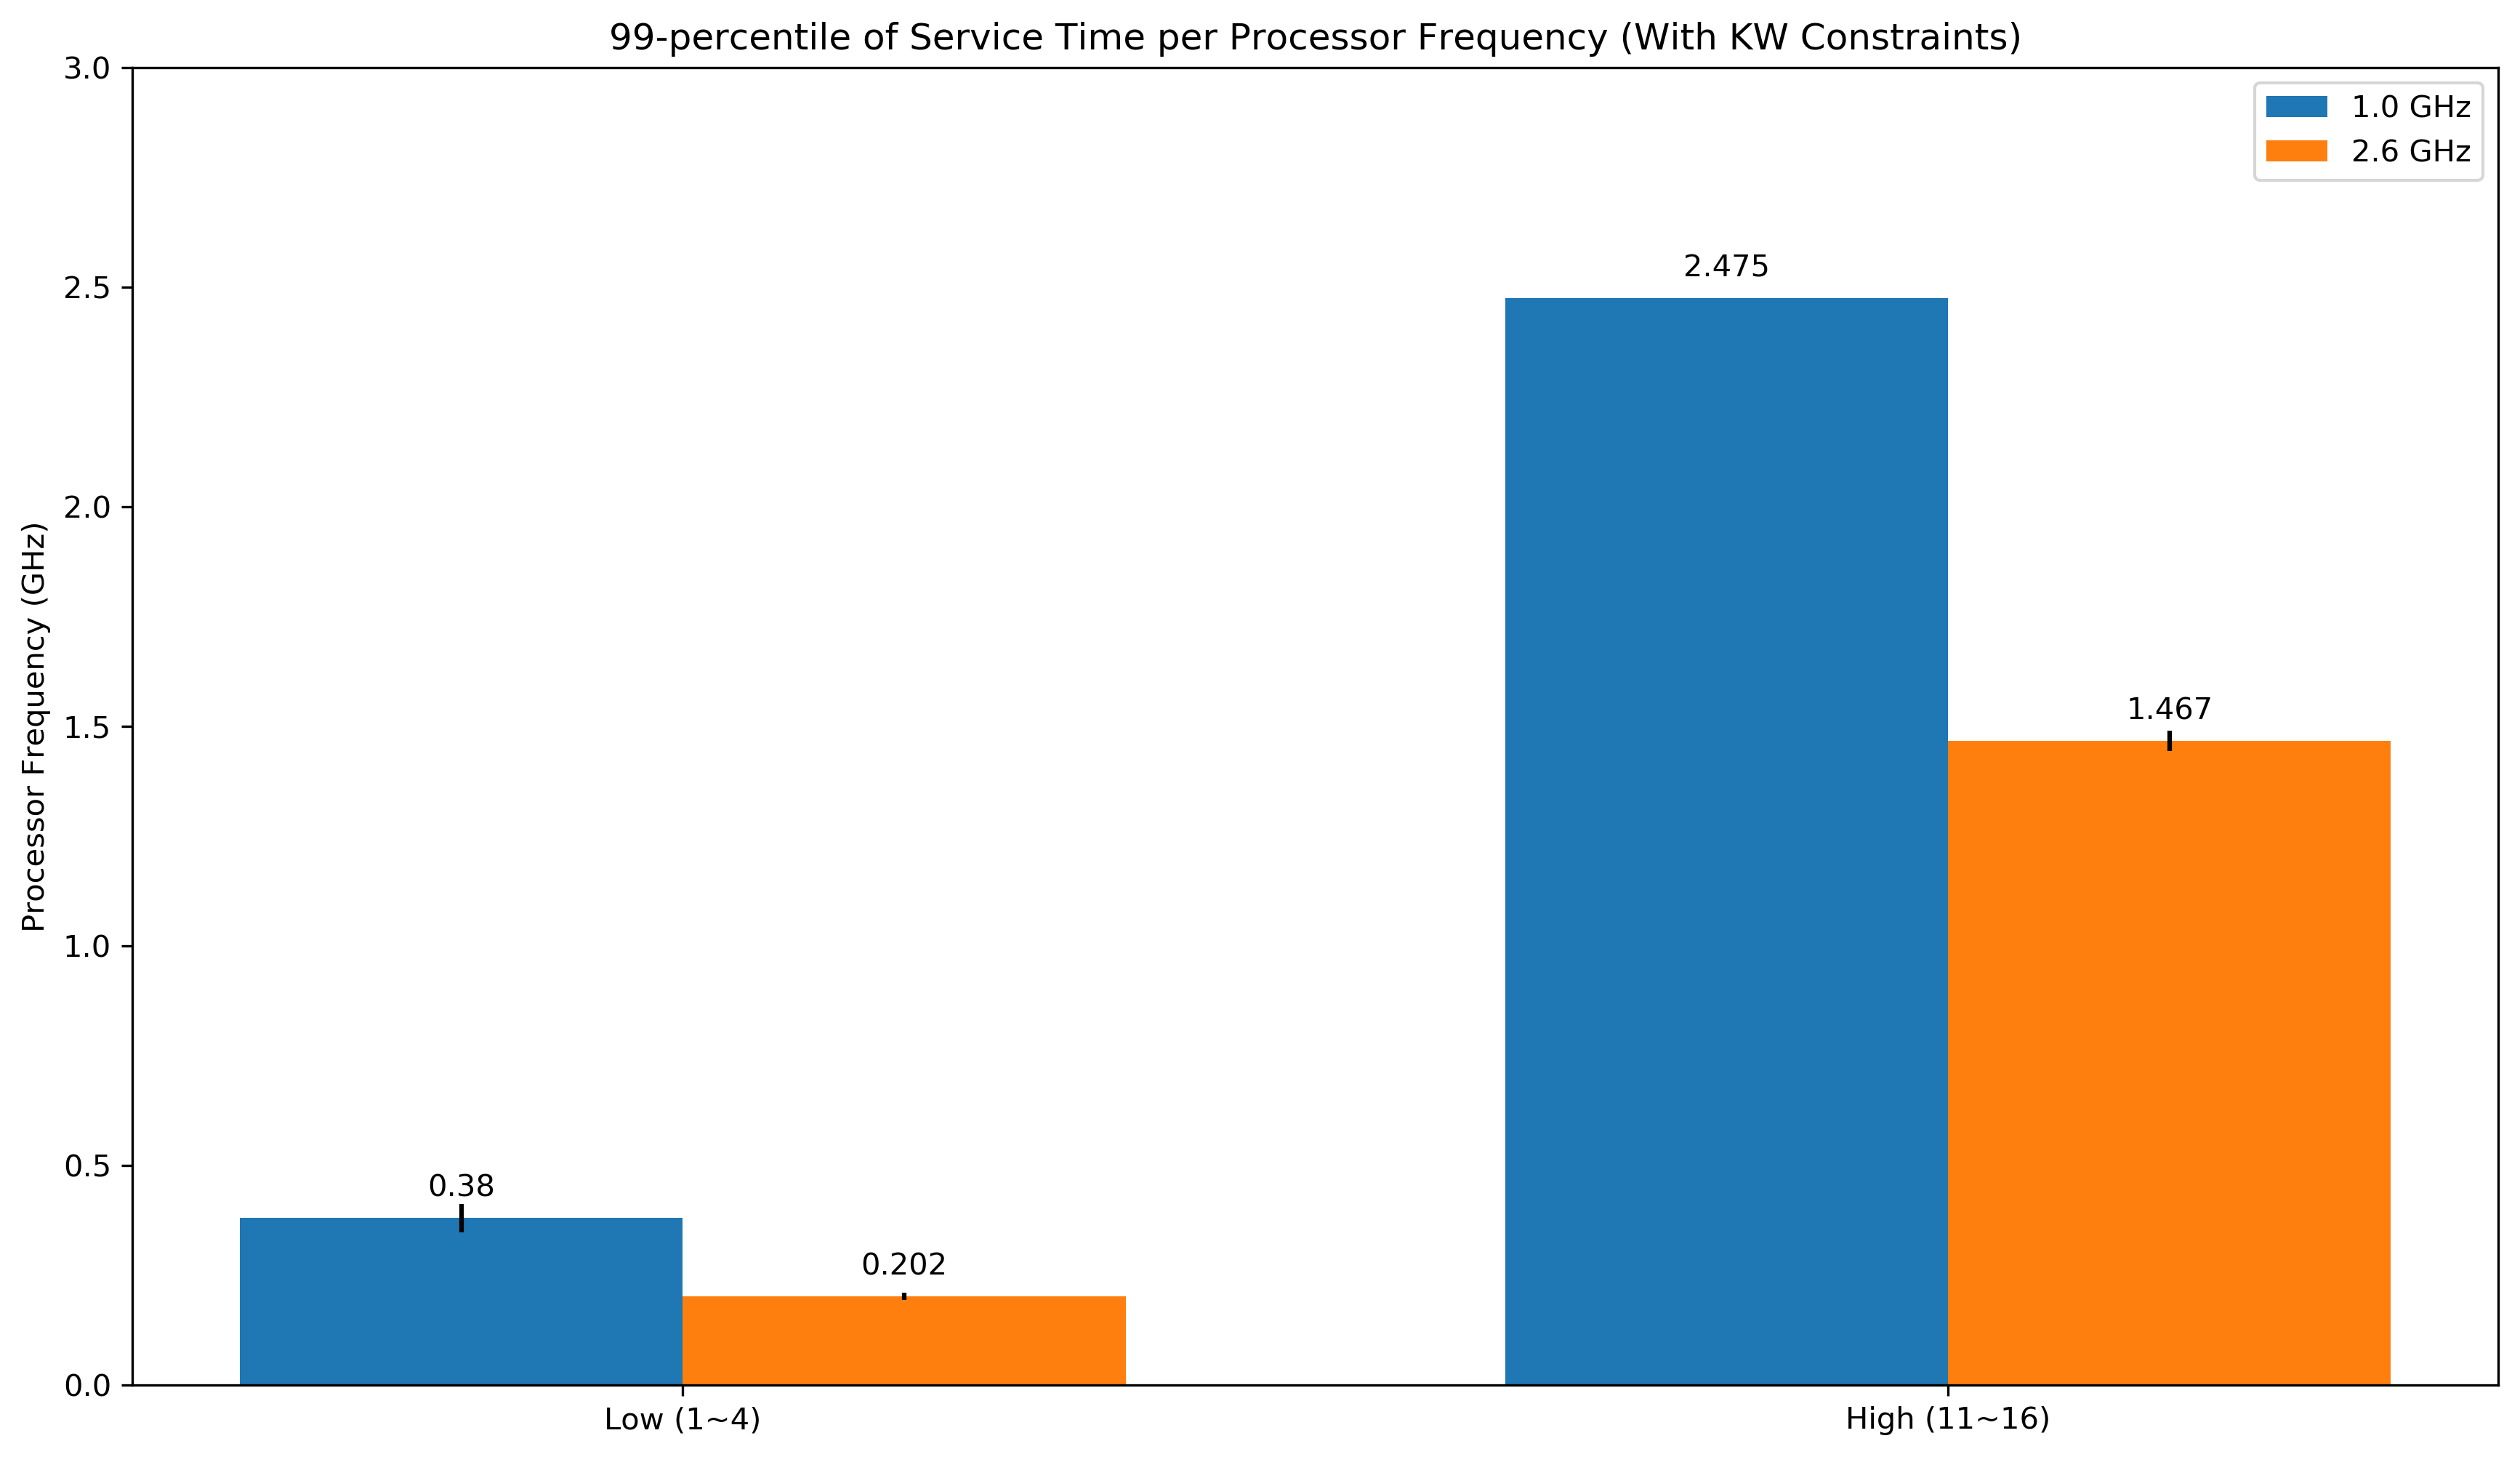

In [23]:
labels = ['Low (1~4)', 'High (11~16)']
stmixed_10 = [stmixed_10_low.mean(), stmixed_10_high.mean()]
stmixed_10_std = [stmixed_10_low.std(), stmixed_10_high.std()]
stmixed_10 = np.round(stmixed_10, 3)
stmixed_26 = [stmixed_26_low.mean(), stmixed_26_high.mean()]
stmixed_26_std = [stmixed_26_low.std(), stmixed_26_high.std()]
stmixed_26 = np.round(stmixed_26, 3)


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14,8), dpi=300)
rects1 = ax.bar(x - width/2, stmixed_10, width, yerr=stmixed_10_std, label="1.0 GHz")
rects2 = ax.bar(x + width/2, stmixed_26, width, yerr=stmixed_26_std, label="2.6 GHz")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Energy Consumption (kJ)')
ax.set_ylabel('Processor Frequency (GHz)')

ax.set_title('99-percentile of Service Time per Processor Frequency (With KW Constraints)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
ax.set_ylim(0,3)
#fig.tight_layout()

plt.show()
fig.savefig('D:\\elastic-hurryup\\graphs\\keyword_influences.png')

In [24]:
stmixed_10_low = np.array([ 15.21, 15.57, 15.91])
stmixed_10_high = np.array([ 30.68, 30.95, 31.04])
stmixed_26_low = np.array([ 14.70, 14.58, 14.72])
stmixed_26_high = np.array([ 63.03, 63.34]) 

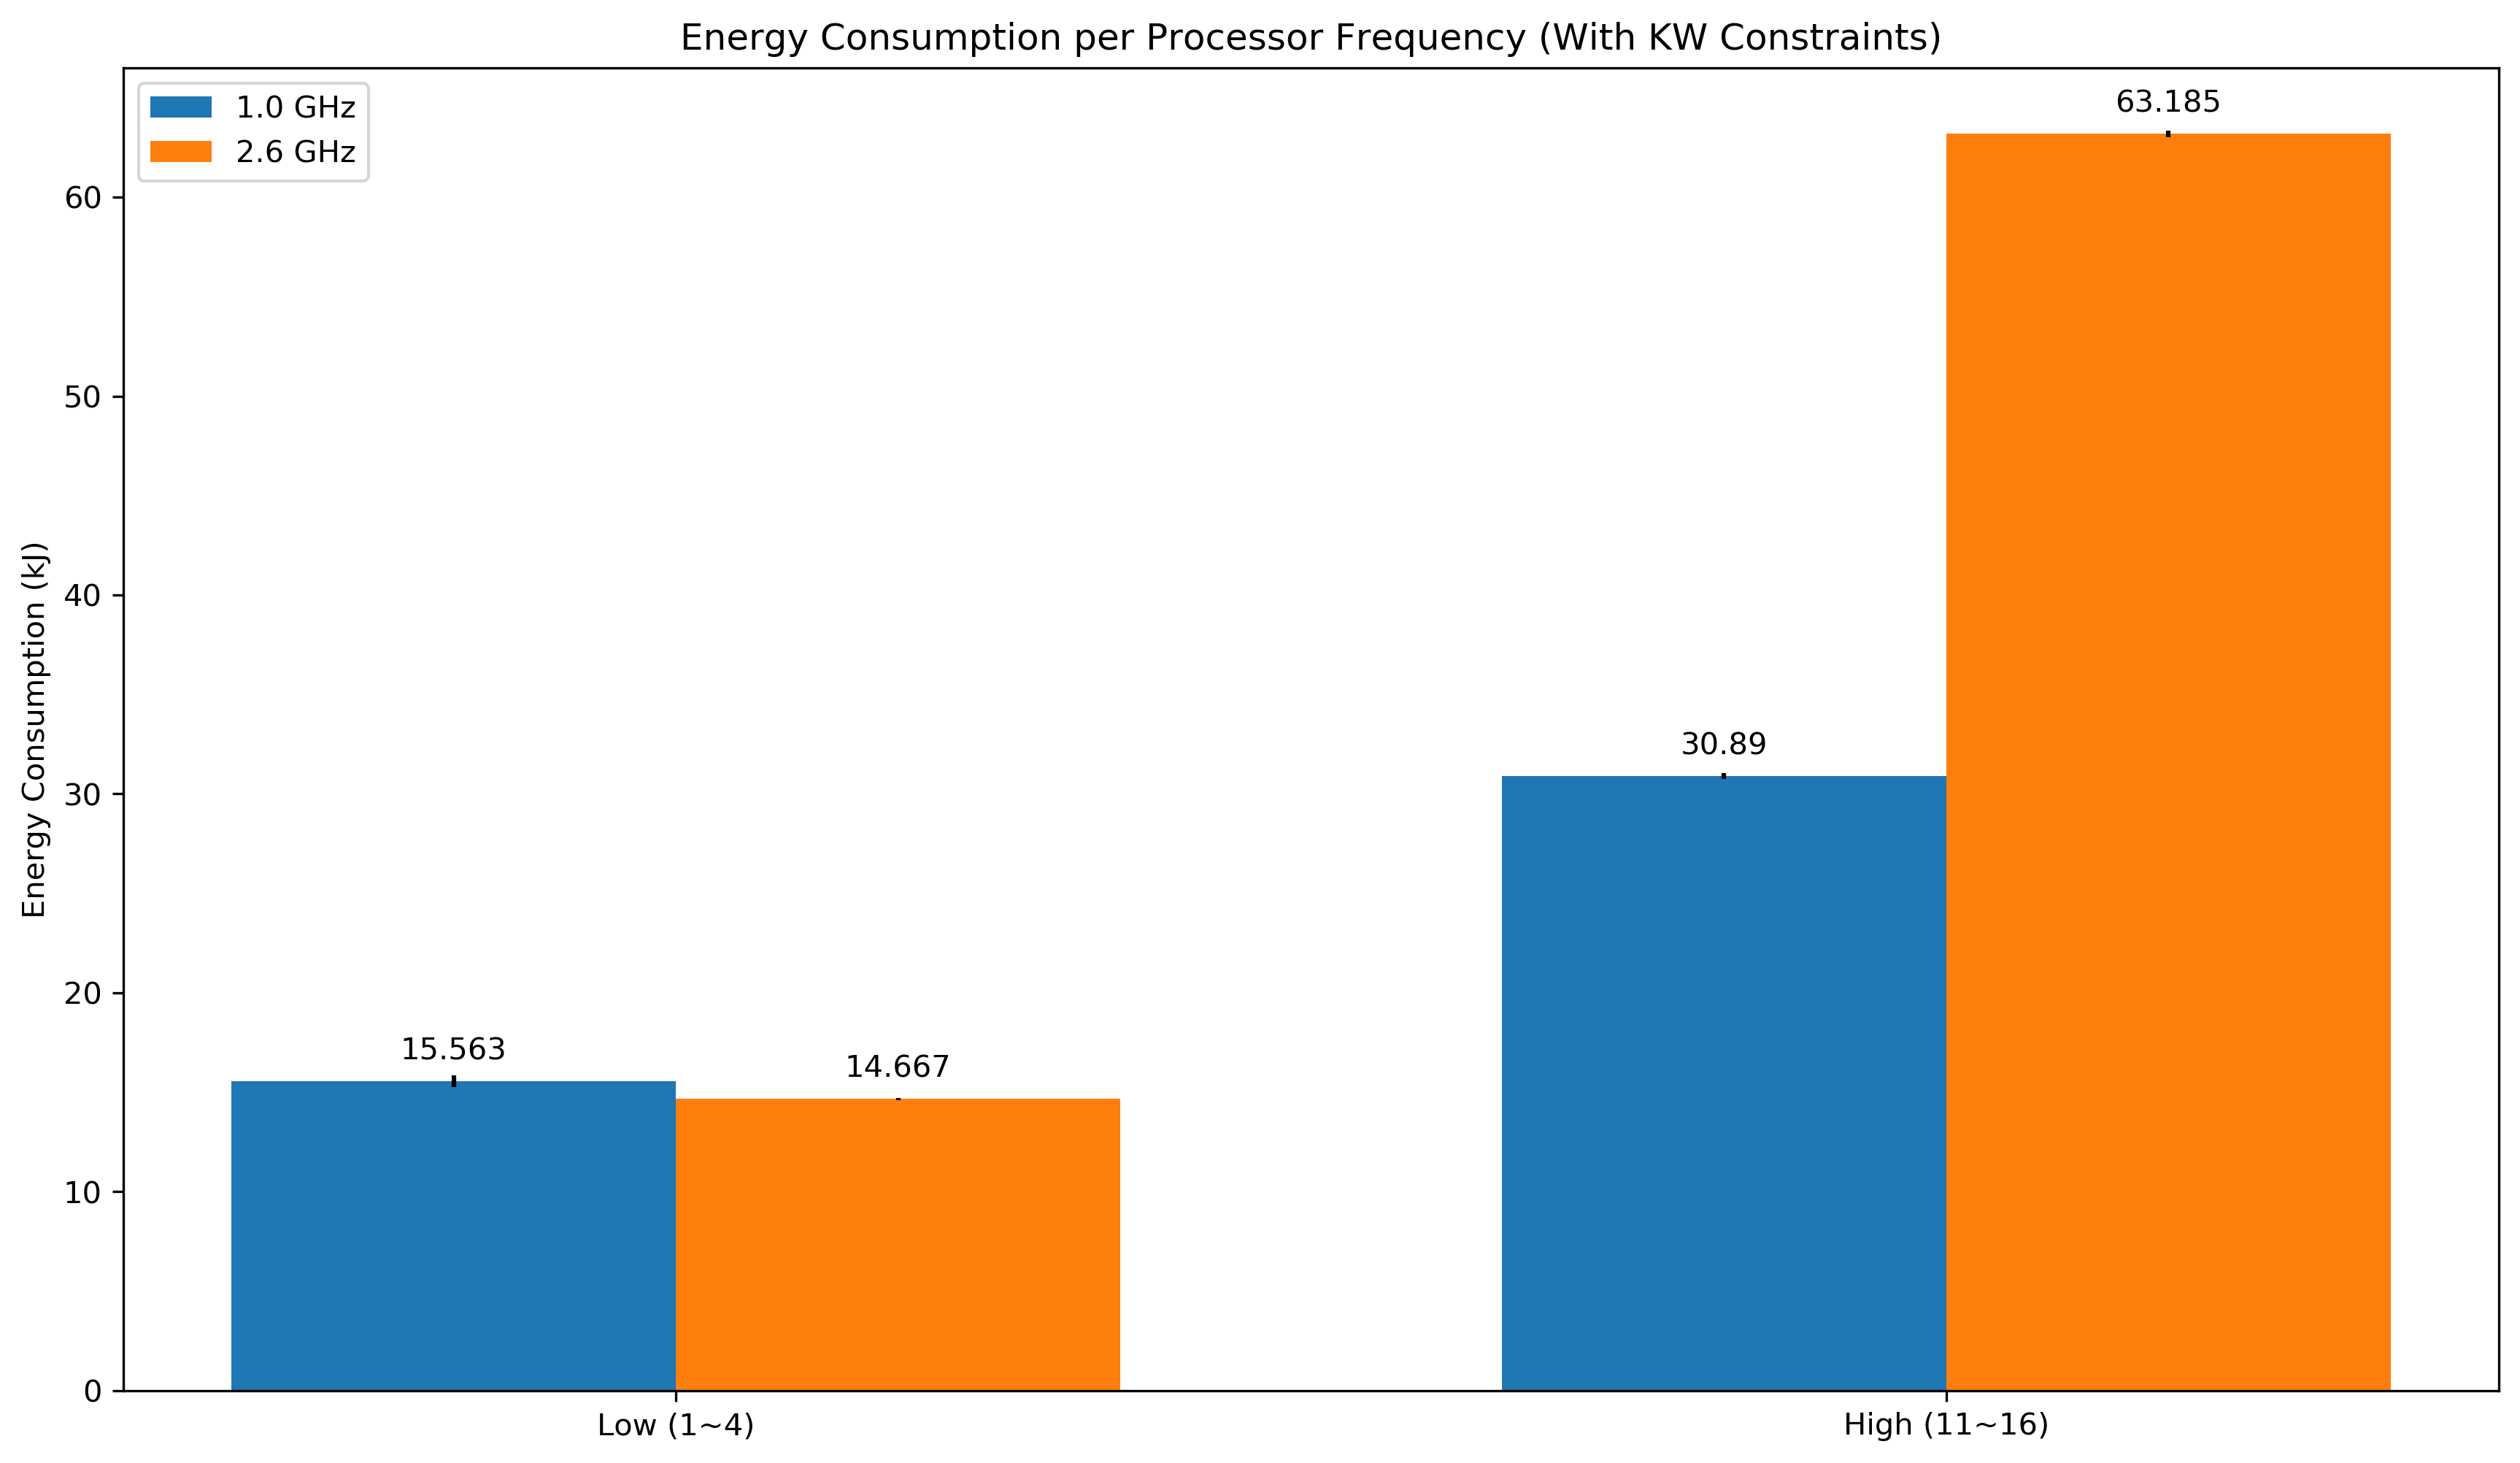

In [25]:
labels = ['Low', 'High']
stmixed_10 = [stmixed_10_low.mean(), stmixed_10_high.mean()]
stmixed_10_std = [stmixed_10_low.std(), stmixed_10_high.std()]
stmixed_10 = np.round(stmixed_10, 3)
stmixed_26 = [stmixed_26_low.mean(), stmixed_26_high.mean()]
stmixed_26_std = [stmixed_26_low.std(), stmixed_26_high.std()]
stmixed_26 = np.round(stmixed_26, 3)


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14,8), dpi=300)
rects1 = ax.bar(x - width/2, stmixed_10, width, yerr=stmixed_10_std, label="1.0 GHz")
rects2 = ax.bar(x + width/2, stmixed_26, width, yerr=stmixed_26_std, label="2.6 GHz")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Energy Consumption (kJ)')
#ax.set_ylabel('Processor Frequency (GHz)')

ax.set_title('Energy Consumption per Processor Frequency (With KW Constraints)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
#ax.set_ylim(0,3)
#fig.tight_layout()

plt.show()
fig.savefig('D:\\elastic-hurryup\\graphs\\energy_consumption_per_kwlength.png')

In [9]:

psave_high = np.array([ 2.475, 2.475, 2.350])
psave_low = np.array([ 0.950, 0.900, 1.000])
psave_high_energy = np.array([ 56.26, 56.49, 56.53])
psave_low_energy = np.array([ 39.72, 39.83, 39.86])

perf_low = np.array([ 0.320, 0.320, 0.328])
perf_high = np.array([ 0.645, 0.673, 0.678]) 
perf_low_energy = np.array([ 38.81, 37.84, 38.76])
perf_high_energy = np.array([ 80.49, 79.82, 79.87]) 

ondem_low = np.array([ 0.323, 0.340, 0.318])
ondem_high = np.array([ 0.683, 0.723, 0.740])
ondem_low_energy = np.array([ 36.83, 37.75, 36.89])
ondem_high_energy = np.array([ 77.54, 78.09])

hup_low = np.array([ 0.603, 0.558, 0.540])
hup_high = np.array([ 0.825, 0.850, 0.800])
hup_low_energy = np.array([ 39.42, 39.89, 36.83])
hup_high_energy = np.array([ 79.10, 77.87, 77.22])

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

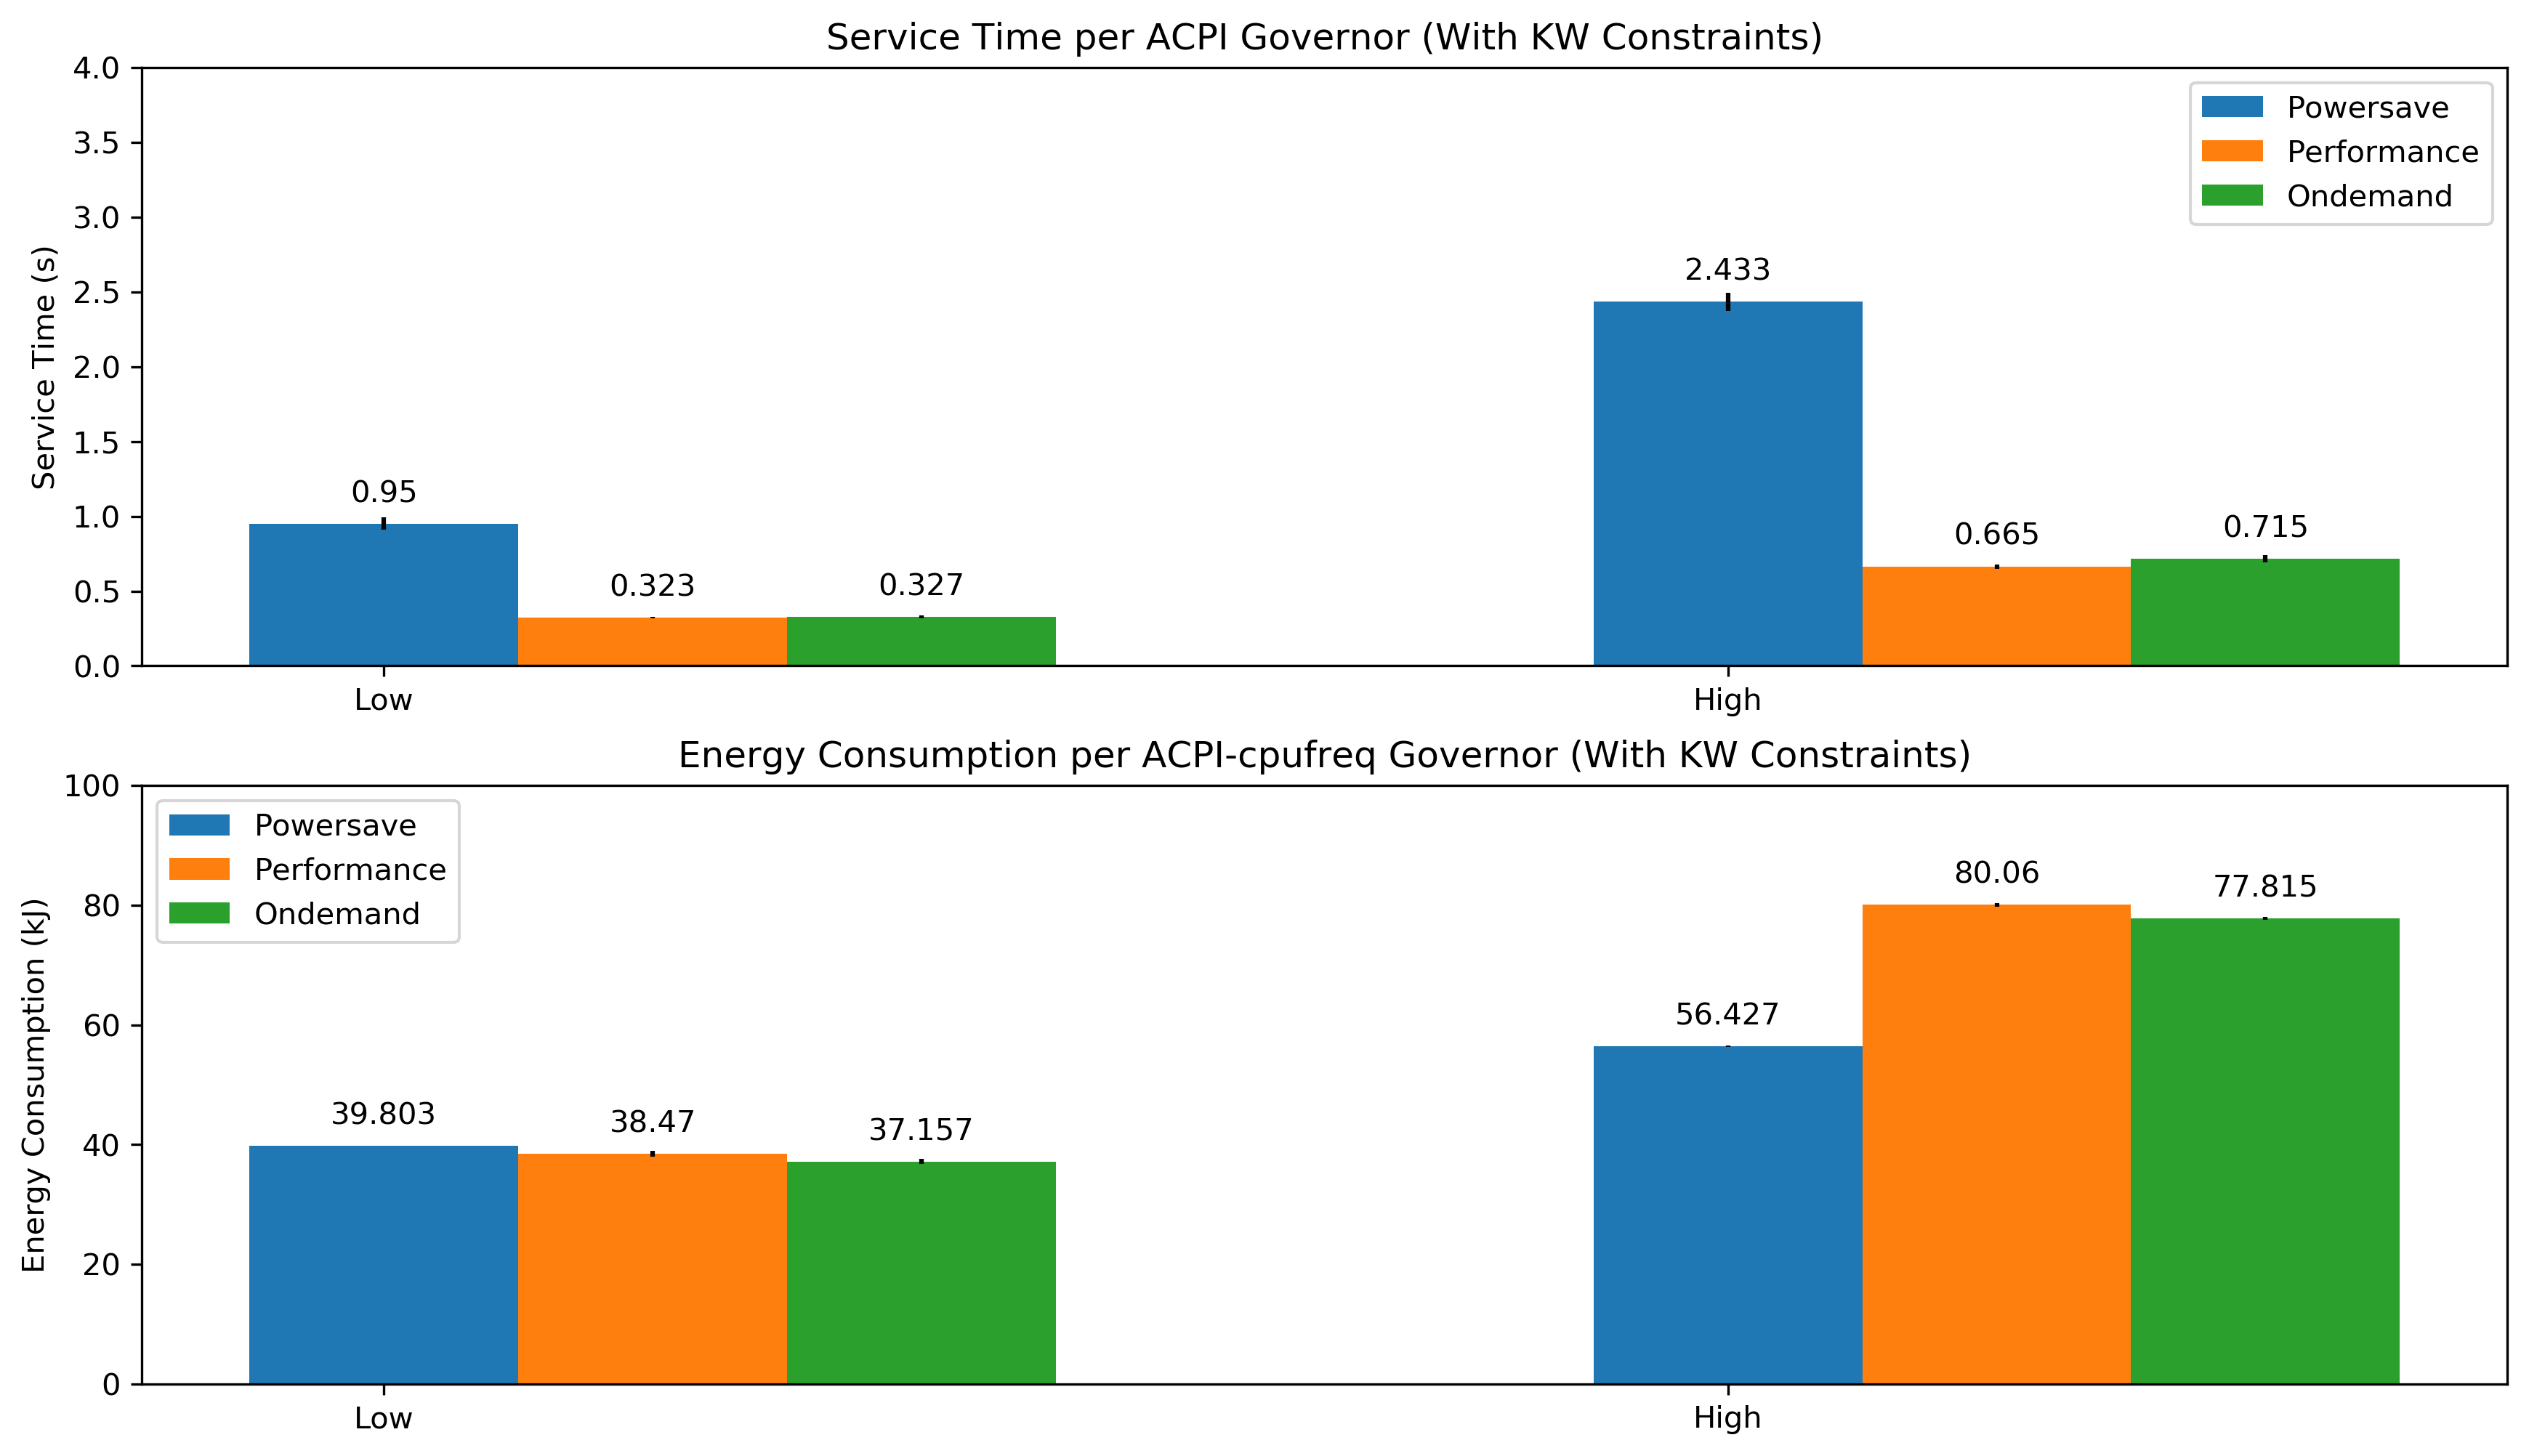

In [8]:
width = 0.20  # the width of the bars
labels=['Low', 'High']
#labels = ['Powersave', 'Performance', 'Ondemand', 'Hurryup']
x = np.arange(len(labels))

psave_means = np.round([psave_low.mean(), psave_high.mean()],3)
psave_std = [psave_low.std(), psave_high.std()]
perf_means = np.round([perf_low.mean(), perf_high.mean()],3)
perf_std = [perf_low.std(), perf_high.std()]
ondem_means = np.round([ondem_low.mean(), ondem_high.mean()],3)
ondem_std = [ondem_low.std(), ondem_high.std()]
hup_means = np.round([hup_low.mean(), hup_high.mean()],3)
hup_std = [hup_low.std(), hup_high.std()]


fig, axs = plt.subplots(2, 1, figsize=(14,8), dpi=300)
ax = axs[0]

r1 = np.arange(len(psave_means))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
#r4 = [x + width for x in r3]

rects1 = ax.bar(r1, psave_means, width, yerr=psave_std, label="Powersave")
rects2 = ax.bar(r2, perf_means, width, yerr=perf_std, label="Performance")
rects3 = ax.bar(r3, ondem_means, width, yerr=ondem_std, label="Ondemand")
#rects4 = ax.bar(r4, hup_means, width, yerr=hup_std, label="Hurryup")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Service Time (s)')
#ax.set_ylabel('Processor Frequency (GHz)')

ax.set_title('Service Time per ACPI Governor (With KW Constraints)')
ax.set_xticks(x)
ax.set_ylim(0,4)
ax.set_xticklabels(labels)
ax.legend()



autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
#autolabel(rects4)

ax = axs[1]

psave_means_energy = np.round([psave_low_energy.mean(), psave_high_energy.mean()],3)
psave_std_energy = [psave_low_energy.std(), psave_high_energy.std()]
perf_means_energy = np.round([perf_low_energy.mean(), perf_high_energy.mean()],3)
perf_std_energy = [perf_low_energy.std(), perf_high_energy.std()]
ondem_means_energy = np.round([ondem_low_energy.mean(), ondem_high_energy.mean()],3)
ondem_std_energy = [ondem_low_energy.std(), ondem_high_energy.std()]
hup_means_energy = np.round([hup_low_energy.mean(), hup_high_energy.mean()],3)
hup_std_energy = [hup_low_energy.std(), hup_high_energy.std()]


r1 = np.arange(len(psave_means))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
#r4 = [x + width for x in r3]

rects1 = ax.bar(r1, psave_means_energy, width, yerr=psave_std_energy, label="Powersave")
rects2 = ax.bar(r2, perf_means_energy, width, yerr=perf_std_energy, label="Performance")
rects3 = ax.bar(r3, ondem_means_energy, width, yerr=ondem_std_energy, label="Ondemand")
#rects4 = ax.bar(r4, hup_means_energy, width, yerr=hup_std_energy, label="Hurryup")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Energy Consumption (kJ)')
#ax.set_ylabel('Processor Frequency (GHz)')

ax.set_title('Energy Consumption per ACPI-cpufreq Governor (With KW Constraints)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
#autolabel(rects4)

ax.set_ylim(0,100)
#fig.tight_layout()

plt.show()
fig.savefig('D:\\elastic-hurryup\\graphs\\governors_comparison.png')

In [9]:
ondem_low = np.array([ 0.323, 0.340, 0.318])
ondem_high = np.array([ 0.683, 0.723, 0.740])
ondem_mix = np.array([ 0.323, 0.340, 0.318])
ondem_low_energy = np.array([ 36.83, 37.75, 36.89])
ondem_high_energy = np.array([ 77.54, 78.09])
ondem_mix_energy = np.array([ 35.11, 35.38])

hup_low = np.array([ 0.458, 0.463, 0.475])
hup_high = np.array([ 0.875, 0.825, 0.850])
hup_mix = np.array([ 0.503, 0.510, 0.488])
hup_low_energy = np.array([ 36.38, 37.55, 36.90])
hup_high_energy = np.array([ 72.60, 74.34, 73.07])
hup_mix_energy = np.array([ 34.79, 34.04, 33.16])

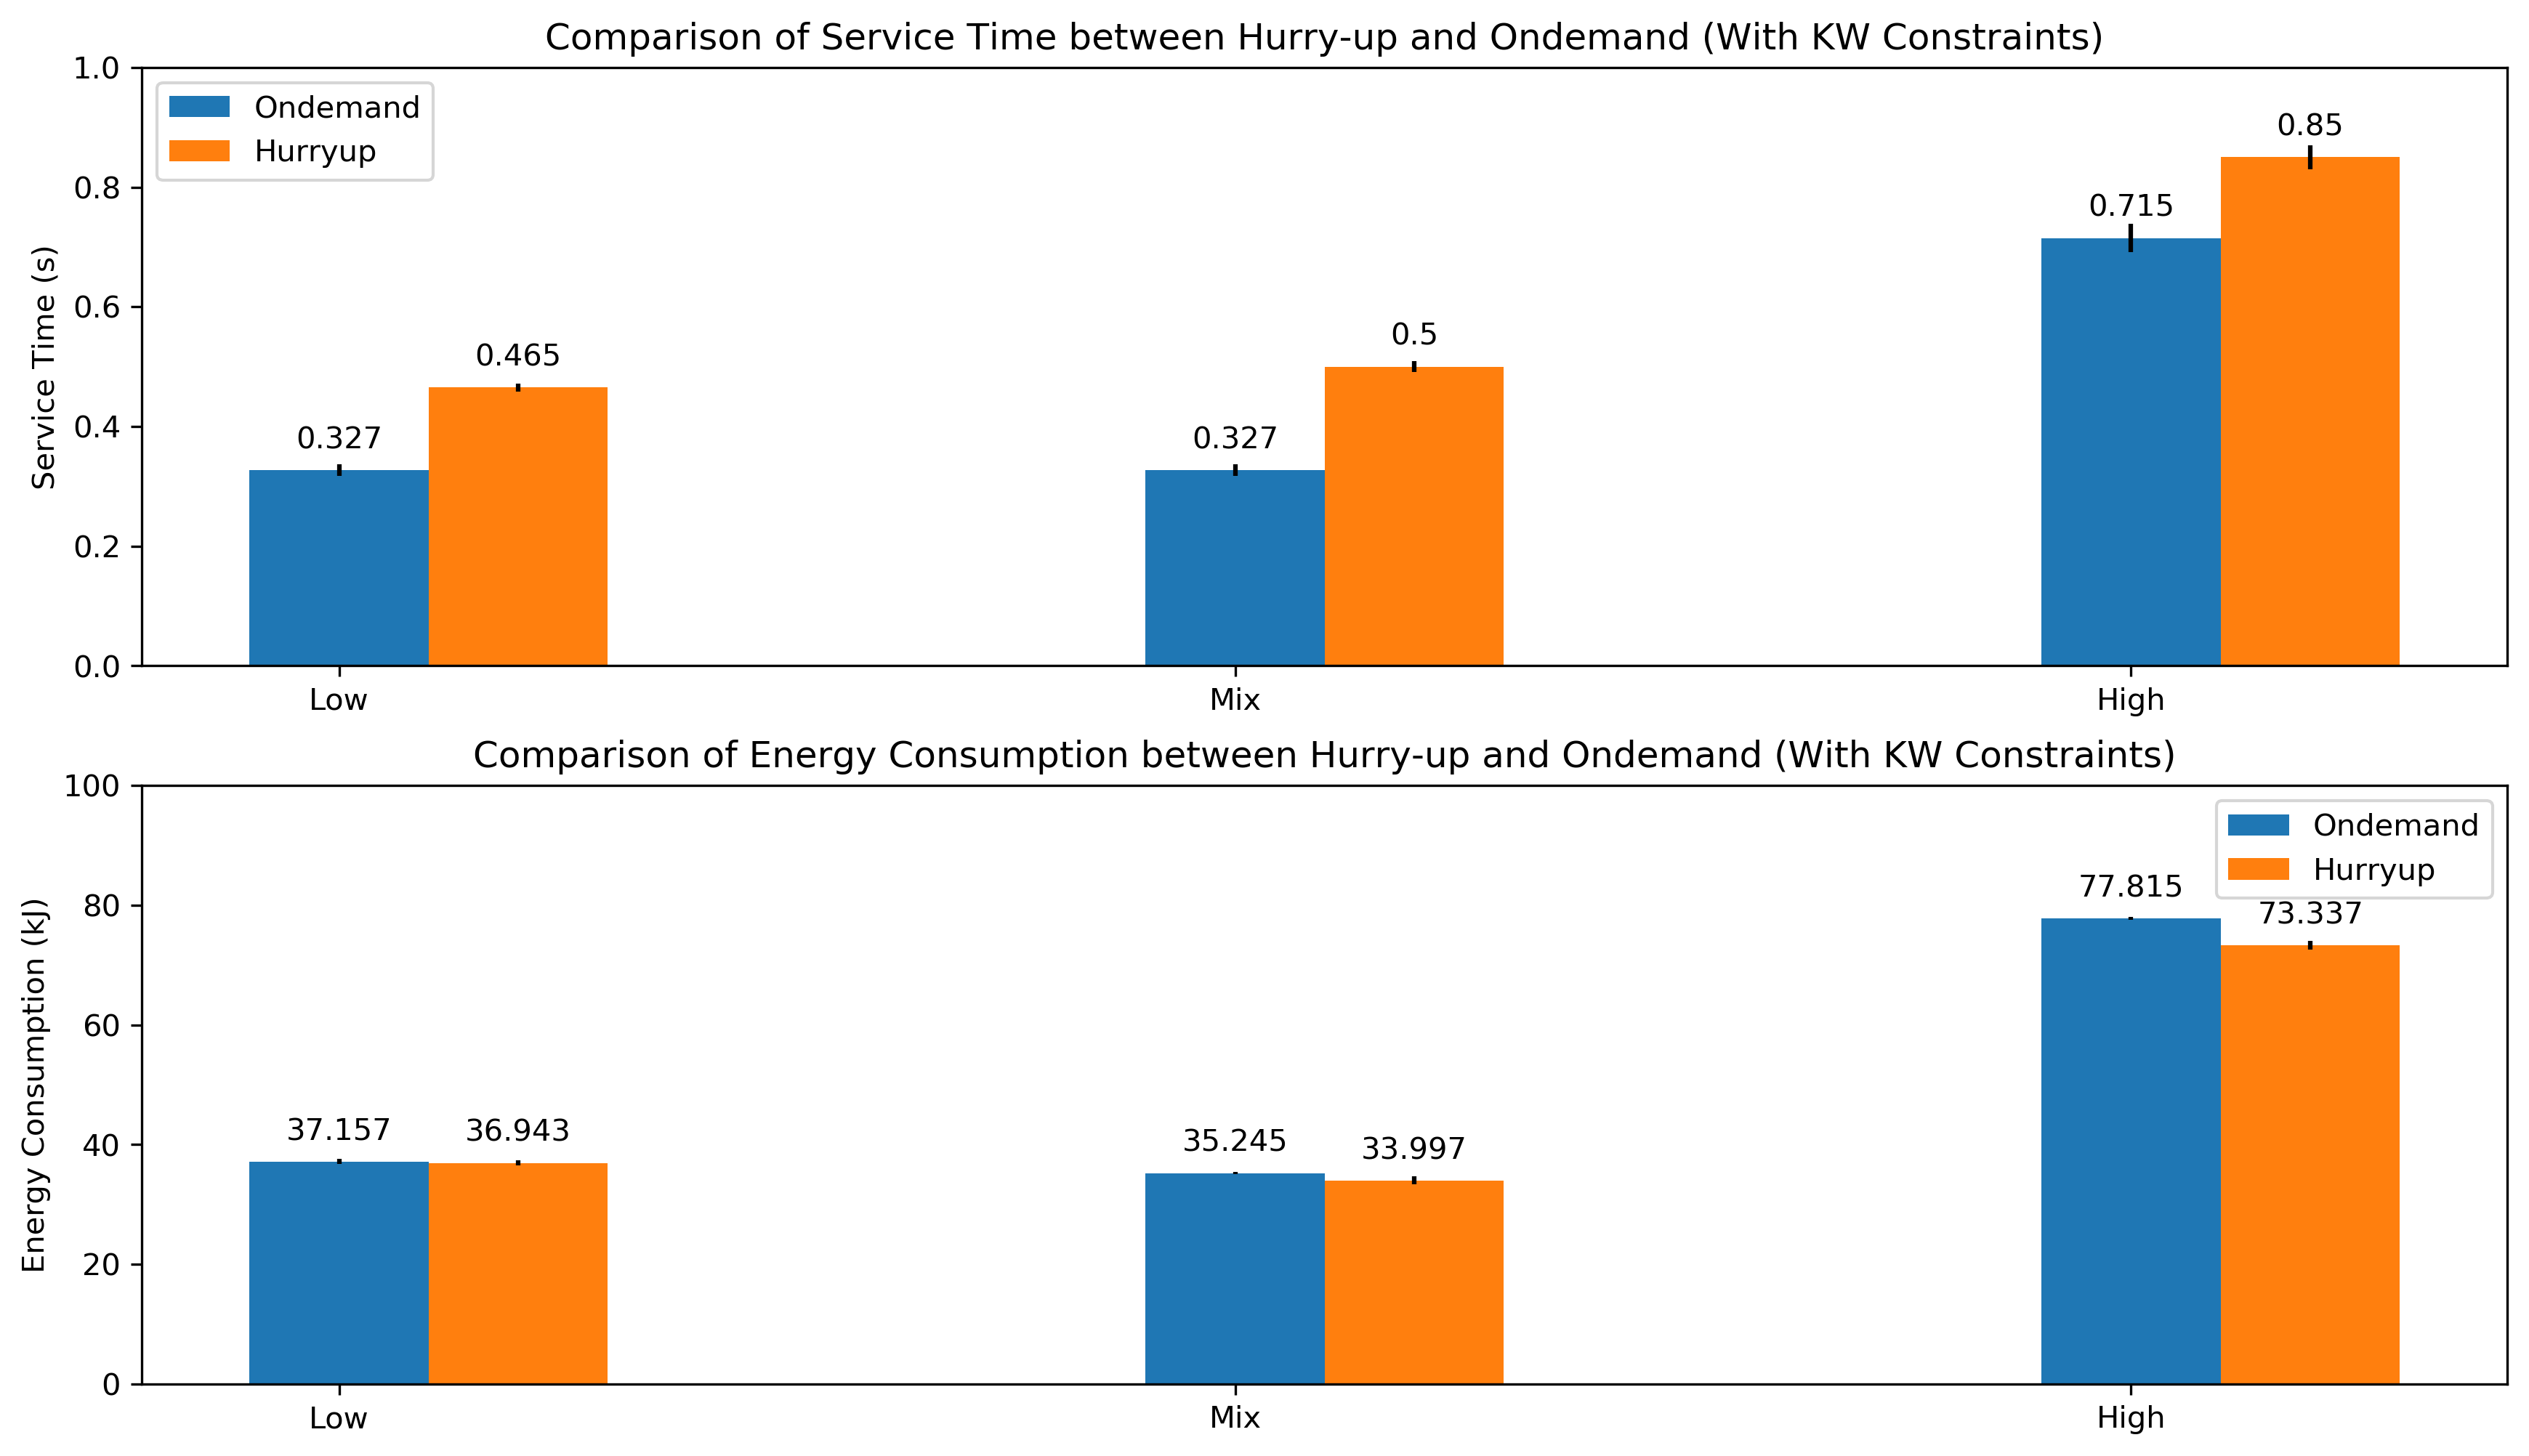

In [13]:
width = 0.20  # the width of the bars
labels=['Low', 'Mix', 'High']
#labels = ['Powersave', 'Performance', 'Ondemand', 'Hurryup']
x = np.arange(len(labels))


ondem_means = np.round([ondem_low.mean(), ondem_mix.mean(), ondem_high.mean()],3)
ondem_std = [ondem_low.std(), ondem_mix.std(), ondem_high.std()]
hup_means = np.round([hup_low.mean(), hup_mix.mean(), hup_high.mean()],3)
hup_std = [hup_low.std(), hup_mix.std(), hup_high.std()]


fig, axs = plt.subplots(2, 1, figsize=(14,8), dpi=300)
ax = axs[0]

r1 = np.arange(len(ondem_means))
r2 = [x + width for x in r1]
#r3 = [x + width for x in r2]
#r4 = [x + width for x in r3]

#rects1 = ax.bar(r1, psave_means, width, yerr=psave_std, label="Powersave")
#rects2 = ax.bar(r2, perf_means, width, yerr=perf_std, label="Performance")
rects3 = ax.bar(r1, ondem_means, width, yerr=ondem_std, label="Ondemand")
rects4 = ax.bar(r2, hup_means, width, yerr=hup_std, label="Hurryup")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Service Time (s)')
#ax.set_ylabel('Processor Frequency (GHz)')

ax.set_title('Comparison of Service Time between Hurry-up and Ondemand (With KW Constraints)')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend()



#autolabel(rects1)
#autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

ax = axs[1]


ondem_means_energy = np.round([ondem_low_energy.mean(), ondem_mix_energy.mean(), ondem_high_energy.mean()],3)
ondem_std_energy = [ondem_low_energy.std(), ondem_mix_energy.std(), ondem_high_energy.std()]
hup_means_energy = np.round([hup_low_energy.mean(), hup_mix_energy.mean(), hup_high_energy.mean()],3)
hup_std_energy = [hup_low_energy.std(), hup_mix_energy.std(), hup_high_energy.std()]


r1 = np.arange(len(ondem_means))
r2 = [x + width for x in r1]
#r3 = [x + width for x in r2]
#r4 = [x + width for x in r3]

#rects1 = ax.bar(r1, psave_means_energy, width, yerr=psave_std_energy, label="Powersave")
#rects2 = ax.bar(r2, perf_means_energy, width, yerr=perf_std_energy, label="Performance")
rects3 = ax.bar(r1, ondem_means_energy, width, yerr=ondem_std_energy, label="Ondemand")
rects4 = ax.bar(r2, hup_means_energy, width, yerr=hup_std_energy, label="Hurryup")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Energy Consumption (kJ)')
#ax.set_ylabel('Processor Frequency (GHz)')

ax.set_title('Comparison of Energy Consumption between Hurry-up and Ondemand (With KW Constraints)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


#autolabel(rects1)
autolabel(rects3)
autolabel(rects4)

ax.set_ylim(0,100)
#fig.tight_layout()

plt.show()
fig.savefig('D:\\elastic-hurryup\\graphs\\ondem_vs_hup.png')

In [4]:
## Overhead

overhead10_low = np.array([1.050, 1.050, 1.025])
psave_low = np.array([ 0.950, 0.900, 1.000])
overhead10_low_energy = np.array([41.90, 41.41, 41.54])
psave_low_energy = np.array([ 39.72, 39.83, 39.86])

perf_low = np.array([ 0.320, 0.320, 0.328])
perf_low_energy = np.array([ 38.81, 37.84, 38.76])
overhead26_low = np.array([0.453, 0.460, 0.453])
overhead26_low_energy = np.array([43.24, 42.73, 43.21])

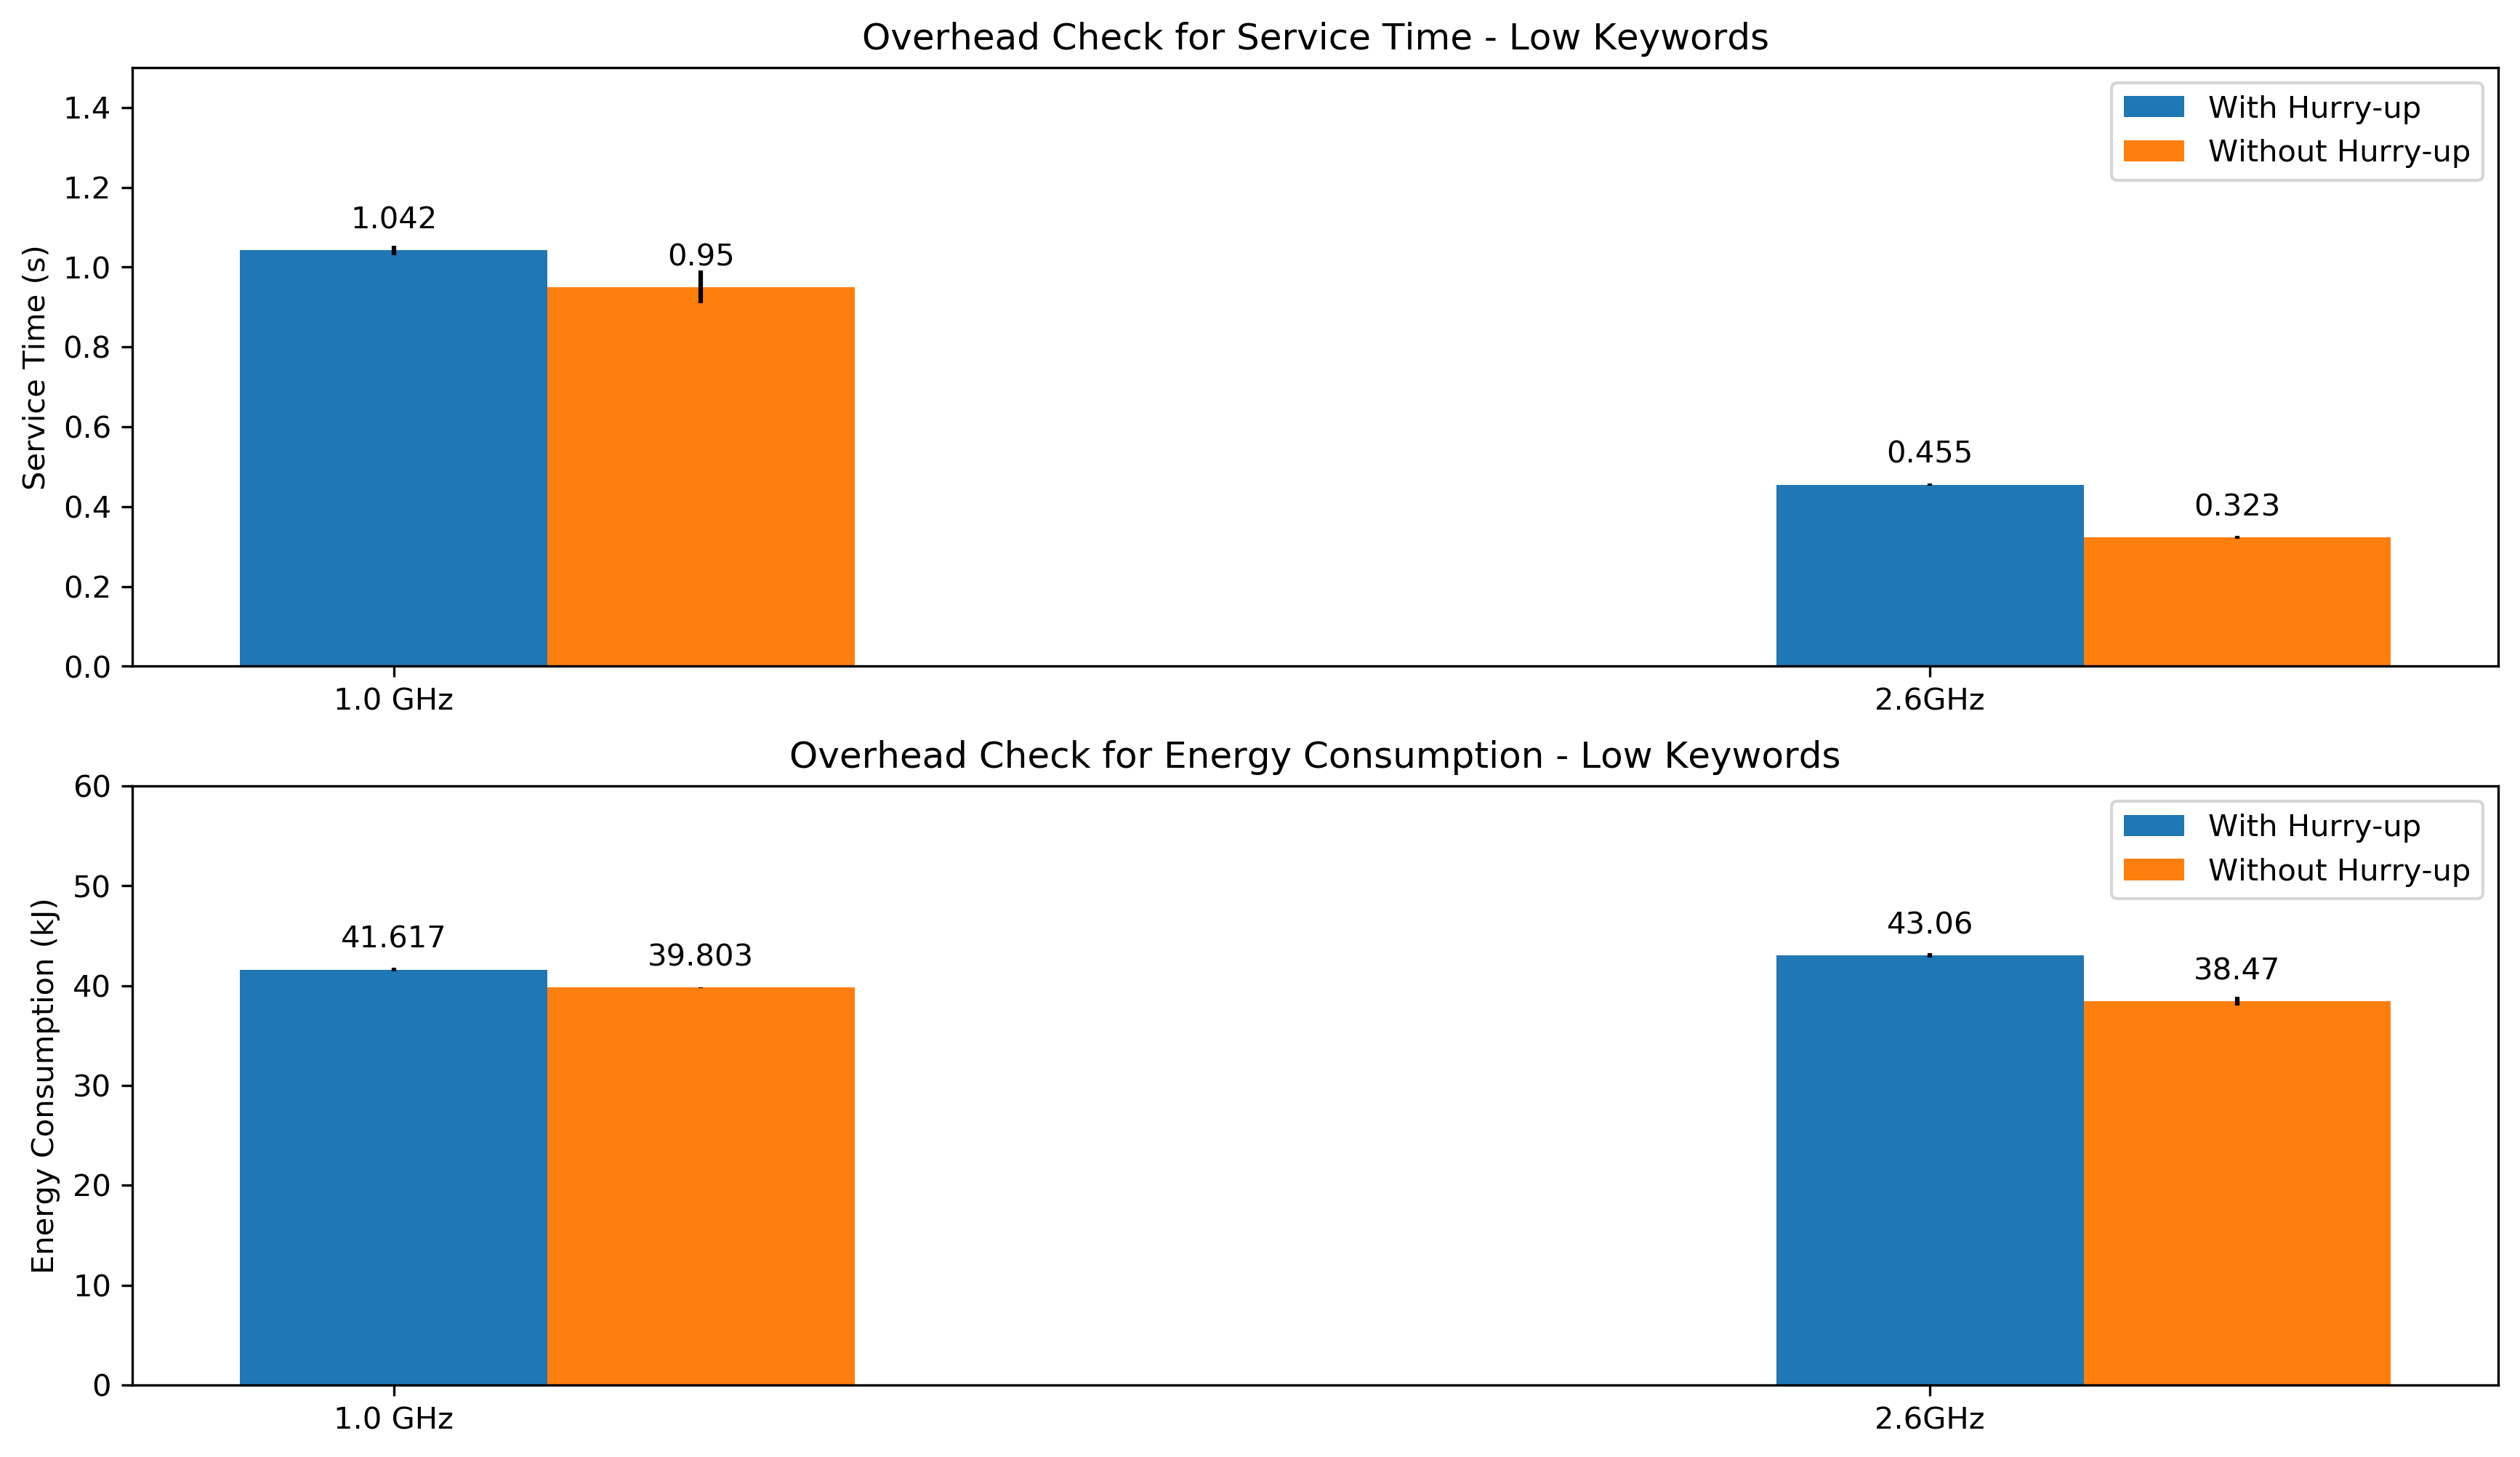

In [11]:
width = 0.20  # the width of the bars
labels=['1.0 GHz', '2.6GHz']
#labels = ['Powersave', 'Performance', 'Ondemand', 'Hurryup']
x = np.arange(len(labels))


with_hup = np.round([overhead10_low.mean(), overhead26_low.mean()],3)
with_hup_std = [overhead10_low.std(), overhead26_low.std()]
without_hup = np.round([psave_low.mean(), perf_low.mean()],3)
without_hup_std = [psave_low.std(), perf_low.std()]


fig, axs = plt.subplots(2, 1, figsize=(14,8), dpi=300)
ax = axs[0]

r1 = np.arange(len(with_hup))
r2 = [x + width for x in r1]
#r3 = [x + width for x in r2]
#r4 = [x + width for x in r3]

#rects1 = ax.bar(r1, psave_means, width, yerr=psave_std, label="Powersave")
#rects2 = ax.bar(r2, perf_means, width, yerr=perf_std, label="Performance")
rects3 = ax.bar(r1, with_hup, width, yerr=with_hup_std, label="With Hurry-up")
rects4 = ax.bar(r2, without_hup, width, yerr=without_hup_std, label="Without Hurry-up")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Service Time (s)')
#ax.set_ylabel('Processor Frequency (GHz)')

ax.set_title('Overhead Check for Service Time - Low Keywords')
ax.set_xticks(x)
ax.set_ylim(0,1.5)
ax.set_xticklabels(labels)
ax.legend()



#autolabel(rects1)
#autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

ax = axs[1]


withup_energy = np.round([overhead10_low_energy.mean(), overhead26_low_energy.mean()],3)
withup_std_energy = [overhead10_low_energy.std(), overhead26_low_energy.std()]
withouthup_energy = np.round([psave_low_energy.mean(), perf_low_energy.mean()],3)
withouthup_std_energy = [psave_low_energy.std(), perf_low_energy.std()]


r1 = np.arange(len(withup_energy))
r2 = [x + width for x in r1]
#r3 = [x + width for x in r2]
#r4 = [x + width for x in r3]

#rects1 = ax.bar(r1, psave_means_energy, width, yerr=psave_std_energy, label="Powersave")
#rects2 = ax.bar(r2, perf_means_energy, width, yerr=perf_std_energy, label="Performance")
rects3 = ax.bar(r1, withup_energy, width, yerr=withup_std_energy, label="With Hurry-up")
rects4 = ax.bar(r2, withouthup_energy, width, yerr=withouthup_std_energy, label="Without Hurry-up")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Energy Consumption (kJ)')
#ax.set_ylabel('Processor Frequency (GHz)')

ax.set_title('Overhead Check for Energy Consumption - Low Keywords')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


#autolabel(rects1)
autolabel(rects3)
autolabel(rects4)

ax.set_ylim(0,60)
#fig.tight_layout()

plt.show()
fig.savefig('D:\\elastic-hurryup\\graphs\\overhead.png')

In [7]:
# Two States vs Three States - Low Keywords
twostates_20_low = np.array([ 0.558, 0.548, 0.548 ])
twostates_20_low_energy = np.array([ 35.01, 34.56, 34.74 ])
twostates_20_high = np.array([ 1.075, 1.075, 1.075 ])
twostates_20_high_energy = np.array([ 61.84, 61.93, 61.6 ])
twostates_26_low = np.array([ 0.323, 0.325 ])
twostates_26_low_energy = np.array([37.55, 37.95])                            
twostates_26_high = np.array([ 0.625, 0.648, 0.655 ])
twostates_26_high_energy = np.array([76.70, 76.48, 81.39])
ondem_low = np.array([ 0.323, 0.340, 0.318]) 
ondem_low_energy = np.array([ 36.83, 37.75, 36.89])
hup_low = np.array([ 0.458, 0.463, 0.475])
hup_low_energy = np.array([ 36.38, 37.55, 36.90])
hup_high = np.array([ 0.875, 0.825, 0.850])
hup_high_energy = np.array([ 72.60, 74.34, 73.07])
ondem_high = np.array([ 0.683, 0.723, 0.740])
ondem_high_energy = np.array([ 77.54, 78.09])

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


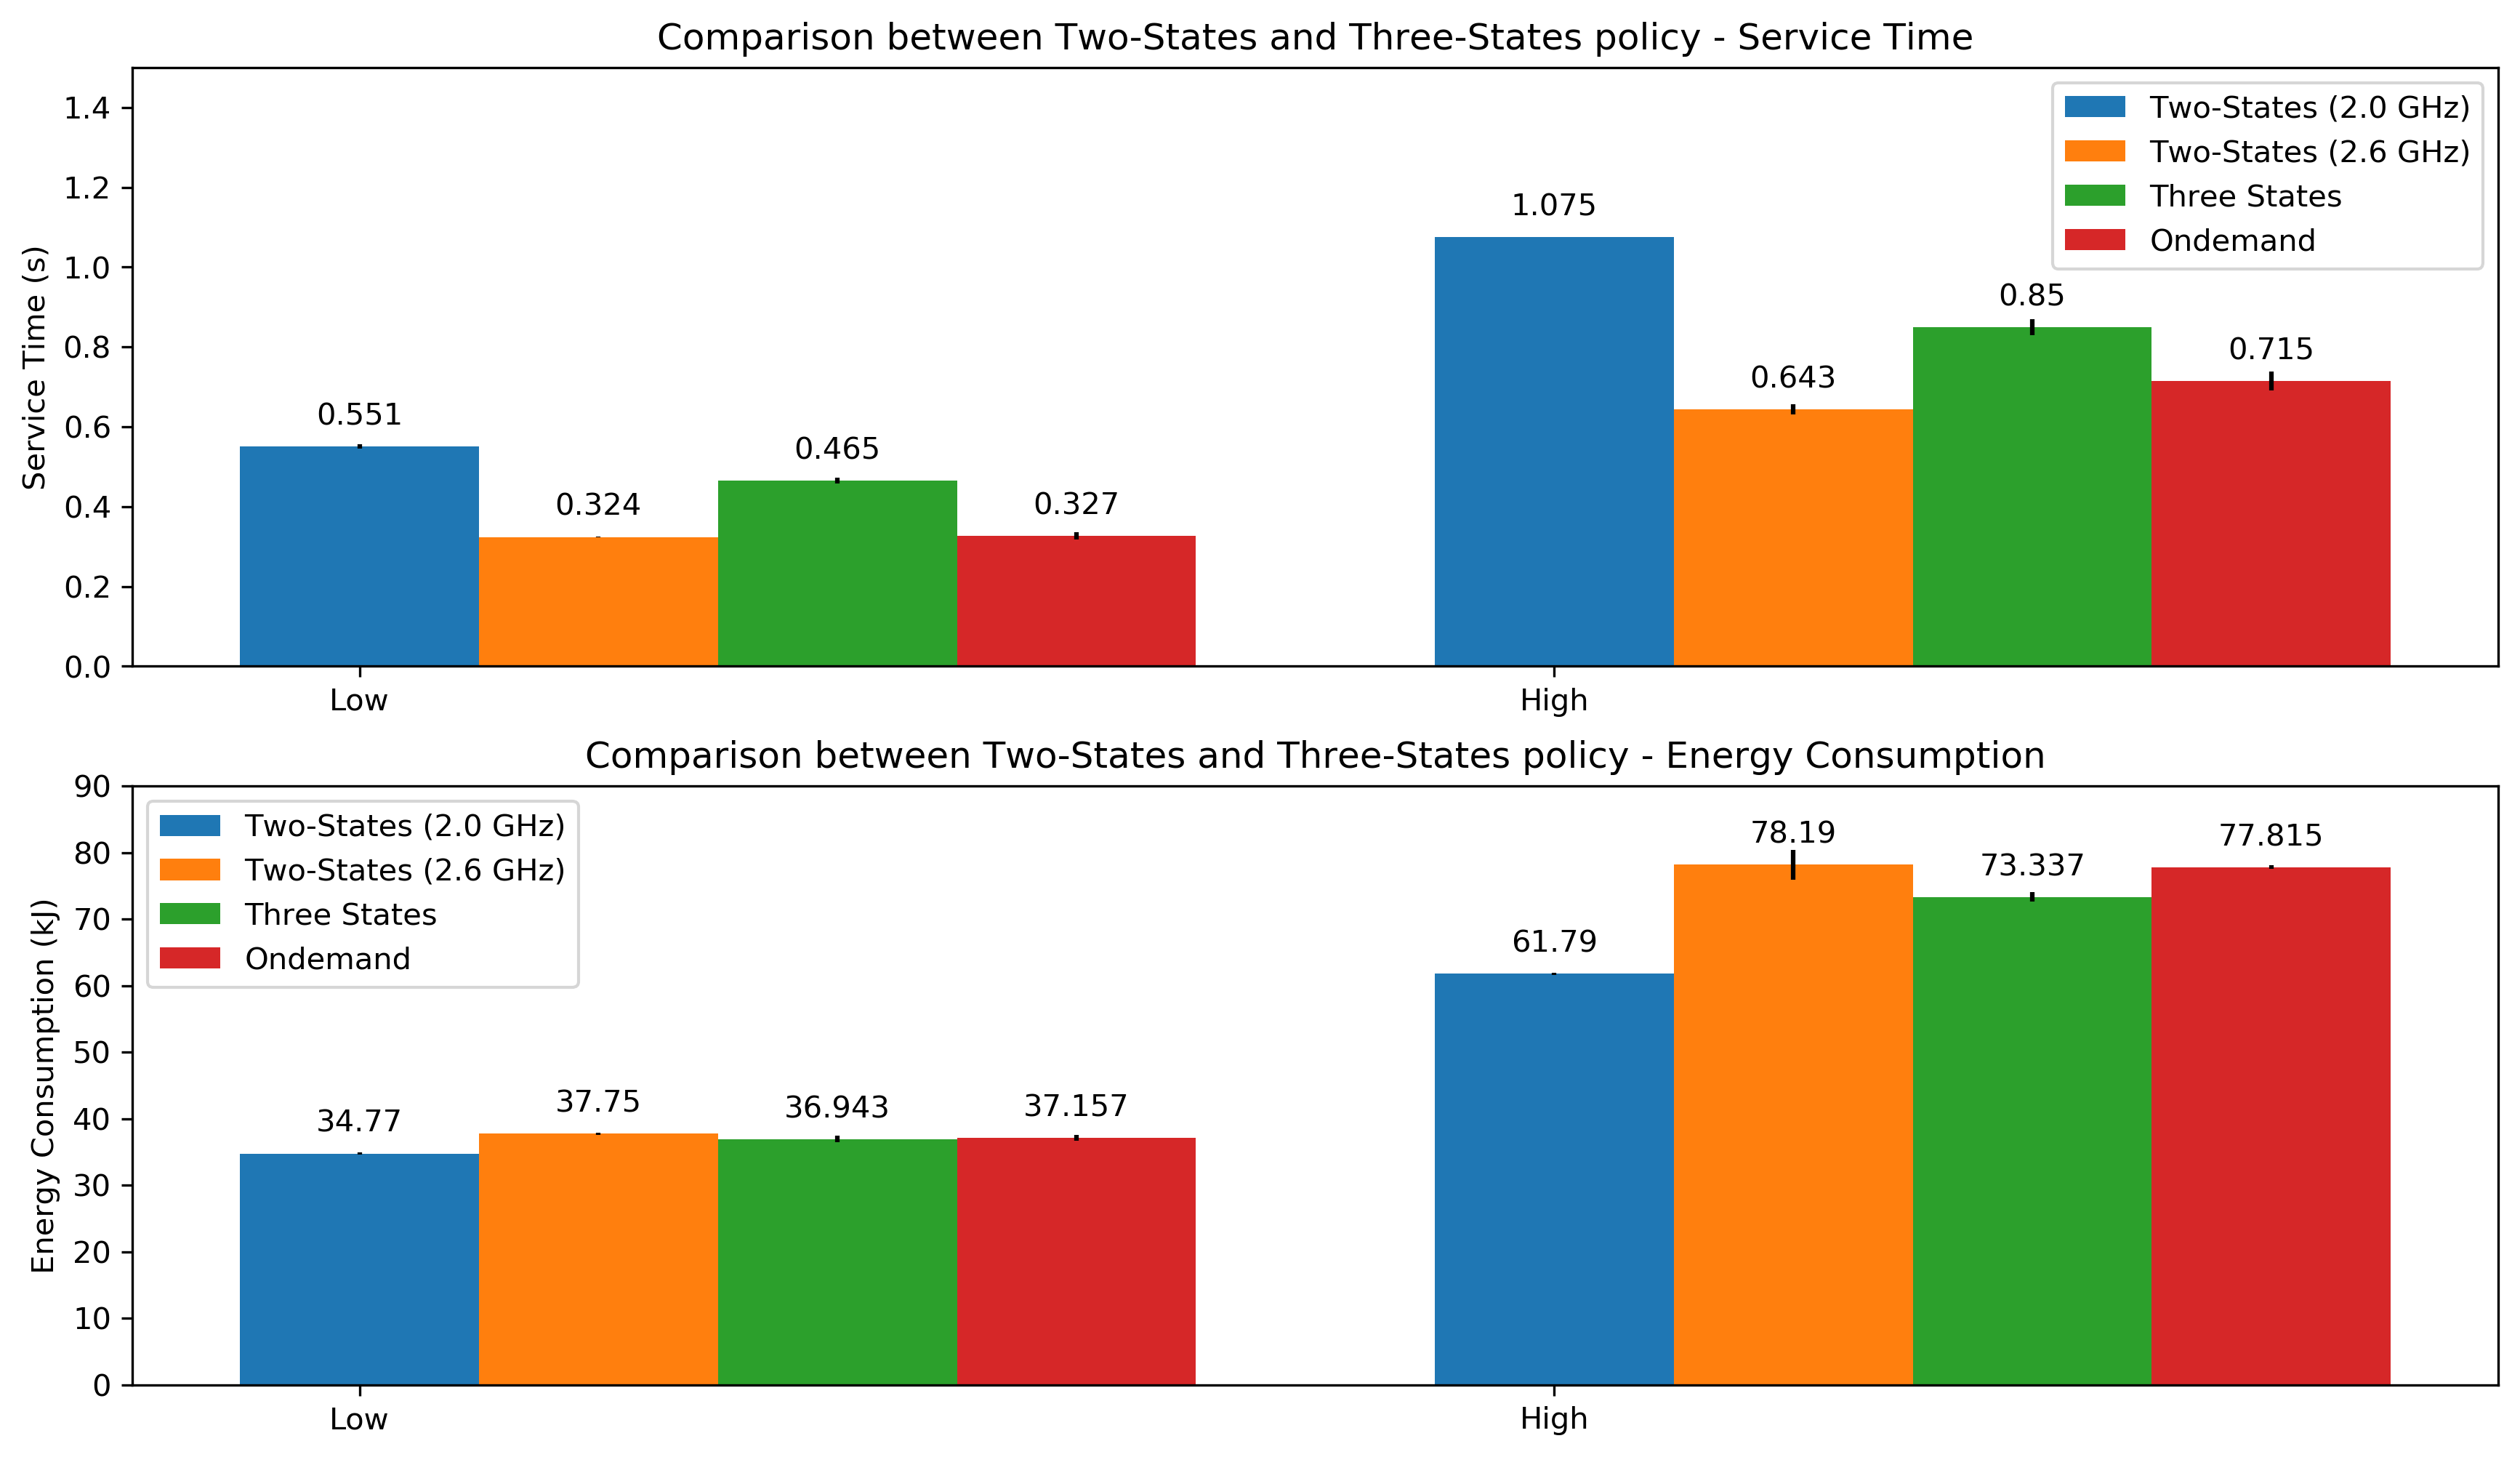

In [13]:
width = 0.20  # the width of the bars
labels=['Low', 'High']
#labels = ['Powersave', 'Performance', 'Ondemand', 'Hurryup']
x = np.arange(len(labels))

twostates_20_mean = np.round([twostates_20_low.mean(), twostates_20_high.mean()],3)
twostates_26_mean = np.round([twostates_26_low.mean(), twostates_26_high.mean()],3)
hup_mean = np.round([hup_low.mean(), hup_high.mean()],3)
ondem_mean = np.round([ondem_low.mean(), ondem_high.mean()],3)
twostates_20_std = [twostates_20_low.std(), twostates_20_high.std()]
twostates_26_std = [twostates_26_low.std(), twostates_26_high.std()]
hup_std = [hup_low.std(), hup_high.std()]
ondem_std = [ondem_low.std(), ondem_high.std()]


fig, axs = plt.subplots(2, 1, figsize=(14,8), dpi=300)
ax = axs[0]

r1 = np.arange(len(twostates_20_mean))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]

rects1 = ax.bar(r1, twostates_20_mean, width, yerr=twostates_20_std, label="Two-States (2.0 GHz)")
rects2 = ax.bar(r2, twostates_26_mean, width, yerr=twostates_26_std, label="Two-States (2.6 GHz)")
rects3 = ax.bar(r3, hup_mean, width, yerr=hup_std, label="Three States")
rects4 = ax.bar(r4, ondem_mean, width, yerr=ondem_std, label="Ondemand")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Service Time (s)')
#ax.set_ylabel('Processor Frequency (GHz)')

ax.set_title('Comparison between Two-States and Three-States policy - Service Time')
ax.set_xticks(x)
ax.set_ylim(0,1.5)
ax.set_xticklabels(labels)
ax.legend()



autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

ax = axs[1]


twostates_20_energy_mean = np.round([twostates_20_low_energy.mean(), twostates_20_high_energy.mean()],3)
twostates_26_energy_mean = np.round([twostates_26_low_energy.mean(), twostates_26_high_energy.mean()],3)
hup_energy_mean = np.round([hup_low_energy.mean(), hup_high_energy.mean()],3)
ondem_energy_mean = np.round([ondem_low_energy.mean(), ondem_high_energy.mean()],3)
twostates_20_energy_std = [twostates_20_low_energy.std(), twostates_20_high_energy.std()]
twostates_26_energy_std = [twostates_26_low_energy.std(), twostates_26_high_energy.std()]
hup_energy_std = [hup_low_energy.std(), hup_high_energy.std()]
ondem_energy_std = [ondem_low_energy.std(), ondem_high_energy.std()]


r1 = np.arange(len(twostates_20_energy_mean))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]

rects1 = ax.bar(r1, twostates_20_energy_mean, width, yerr=twostates_20_energy_std, label="Two-States (2.0 GHz)")
rects2 = ax.bar(r2, twostates_26_energy_mean, width, yerr=twostates_26_energy_std, label="Two-States (2.6 GHz)")
rects3 = ax.bar(r3, hup_energy_mean, width, yerr=hup_energy_std, label="Three States")
rects4 = ax.bar(r4, ondem_energy_mean, width, yerr=ondem_energy_std, label="Ondemand")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Energy Consumption (kJ)')
#ax.set_ylabel('Processor Frequency (GHz)')

ax.set_title('Comparison between Two-States and Three-States policy - Energy Consumption')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

ax.set_ylim(0,90)
#fig.tight_layout()

plt.show()
fig.savefig('D:\\elastic-hurryup\\graphs\\twostates_vs_threestates.png')

In [5]:
# Sensitivity Analysis - Awakeness
sleep5ms_high = np.array([ 0.850 ])
sleep20ms_high = np.array([ 0.825 ])
sleep50ms_high = np.array([ 0.825 ])
sleep100ms_high = np.array([ 0.850 ])
sleep5ms_high_energy = np.array([ 36.46 ])
sleep20ms_high_energy = np.array([ 36.44 ])
sleep50ms_high_energy = np.array([ 35.69 ])
sleep100ms_high_energy = np.array([ 35.80 ])

sleep5ms_low = np.array([ 0.455 ])
sleep20ms_low = np.array([ 0.408 ])
sleep50ms_low = np.array([ 0.518 ])
sleep100ms_low = np.array([ 0.518 ])
sleep5ms_low_energy = np.array([ 19.66 ])
sleep20ms_low_energy = np.array([ 19.65 ])
sleep50ms_low_energy = np.array([ 18.10 ])
sleep100ms_low_energy = np.array([ 18.09 ])

# Sensitivity Analysis - Threshold

thres150ms_high = np.array([ 0.705 ])
thres300ms_high = np.array([ 0.800 ])
thres450ms_high = np.array([ 0.900 ])
thres600ms_high = np.array([ 0.900 ])
thres150ms_high_energy = np.array([ 39.30 ])
thres300ms_high_energy = np.array([ 37.07 ])
thres450ms_high_energy = np.array([ 34.63 ])
thres600ms_high_energy = np.array([ 32.34 ])

thres150ms_low = np.array([ 0.373 ])
thres300ms_low = np.array([ 0.438 ])
thres450ms_low = np.array([ 0.525 ])
thres600ms_low = np.array([ 0.453 ])
thres150ms_low_energy = np.array([ 20.85 ])
thres300ms_low_energy = np.array([ 19.41 ])
thres450ms_low_energy = np.array([ 18.48 ])
thres600ms_low_energy = np.array([ 19.32 ])

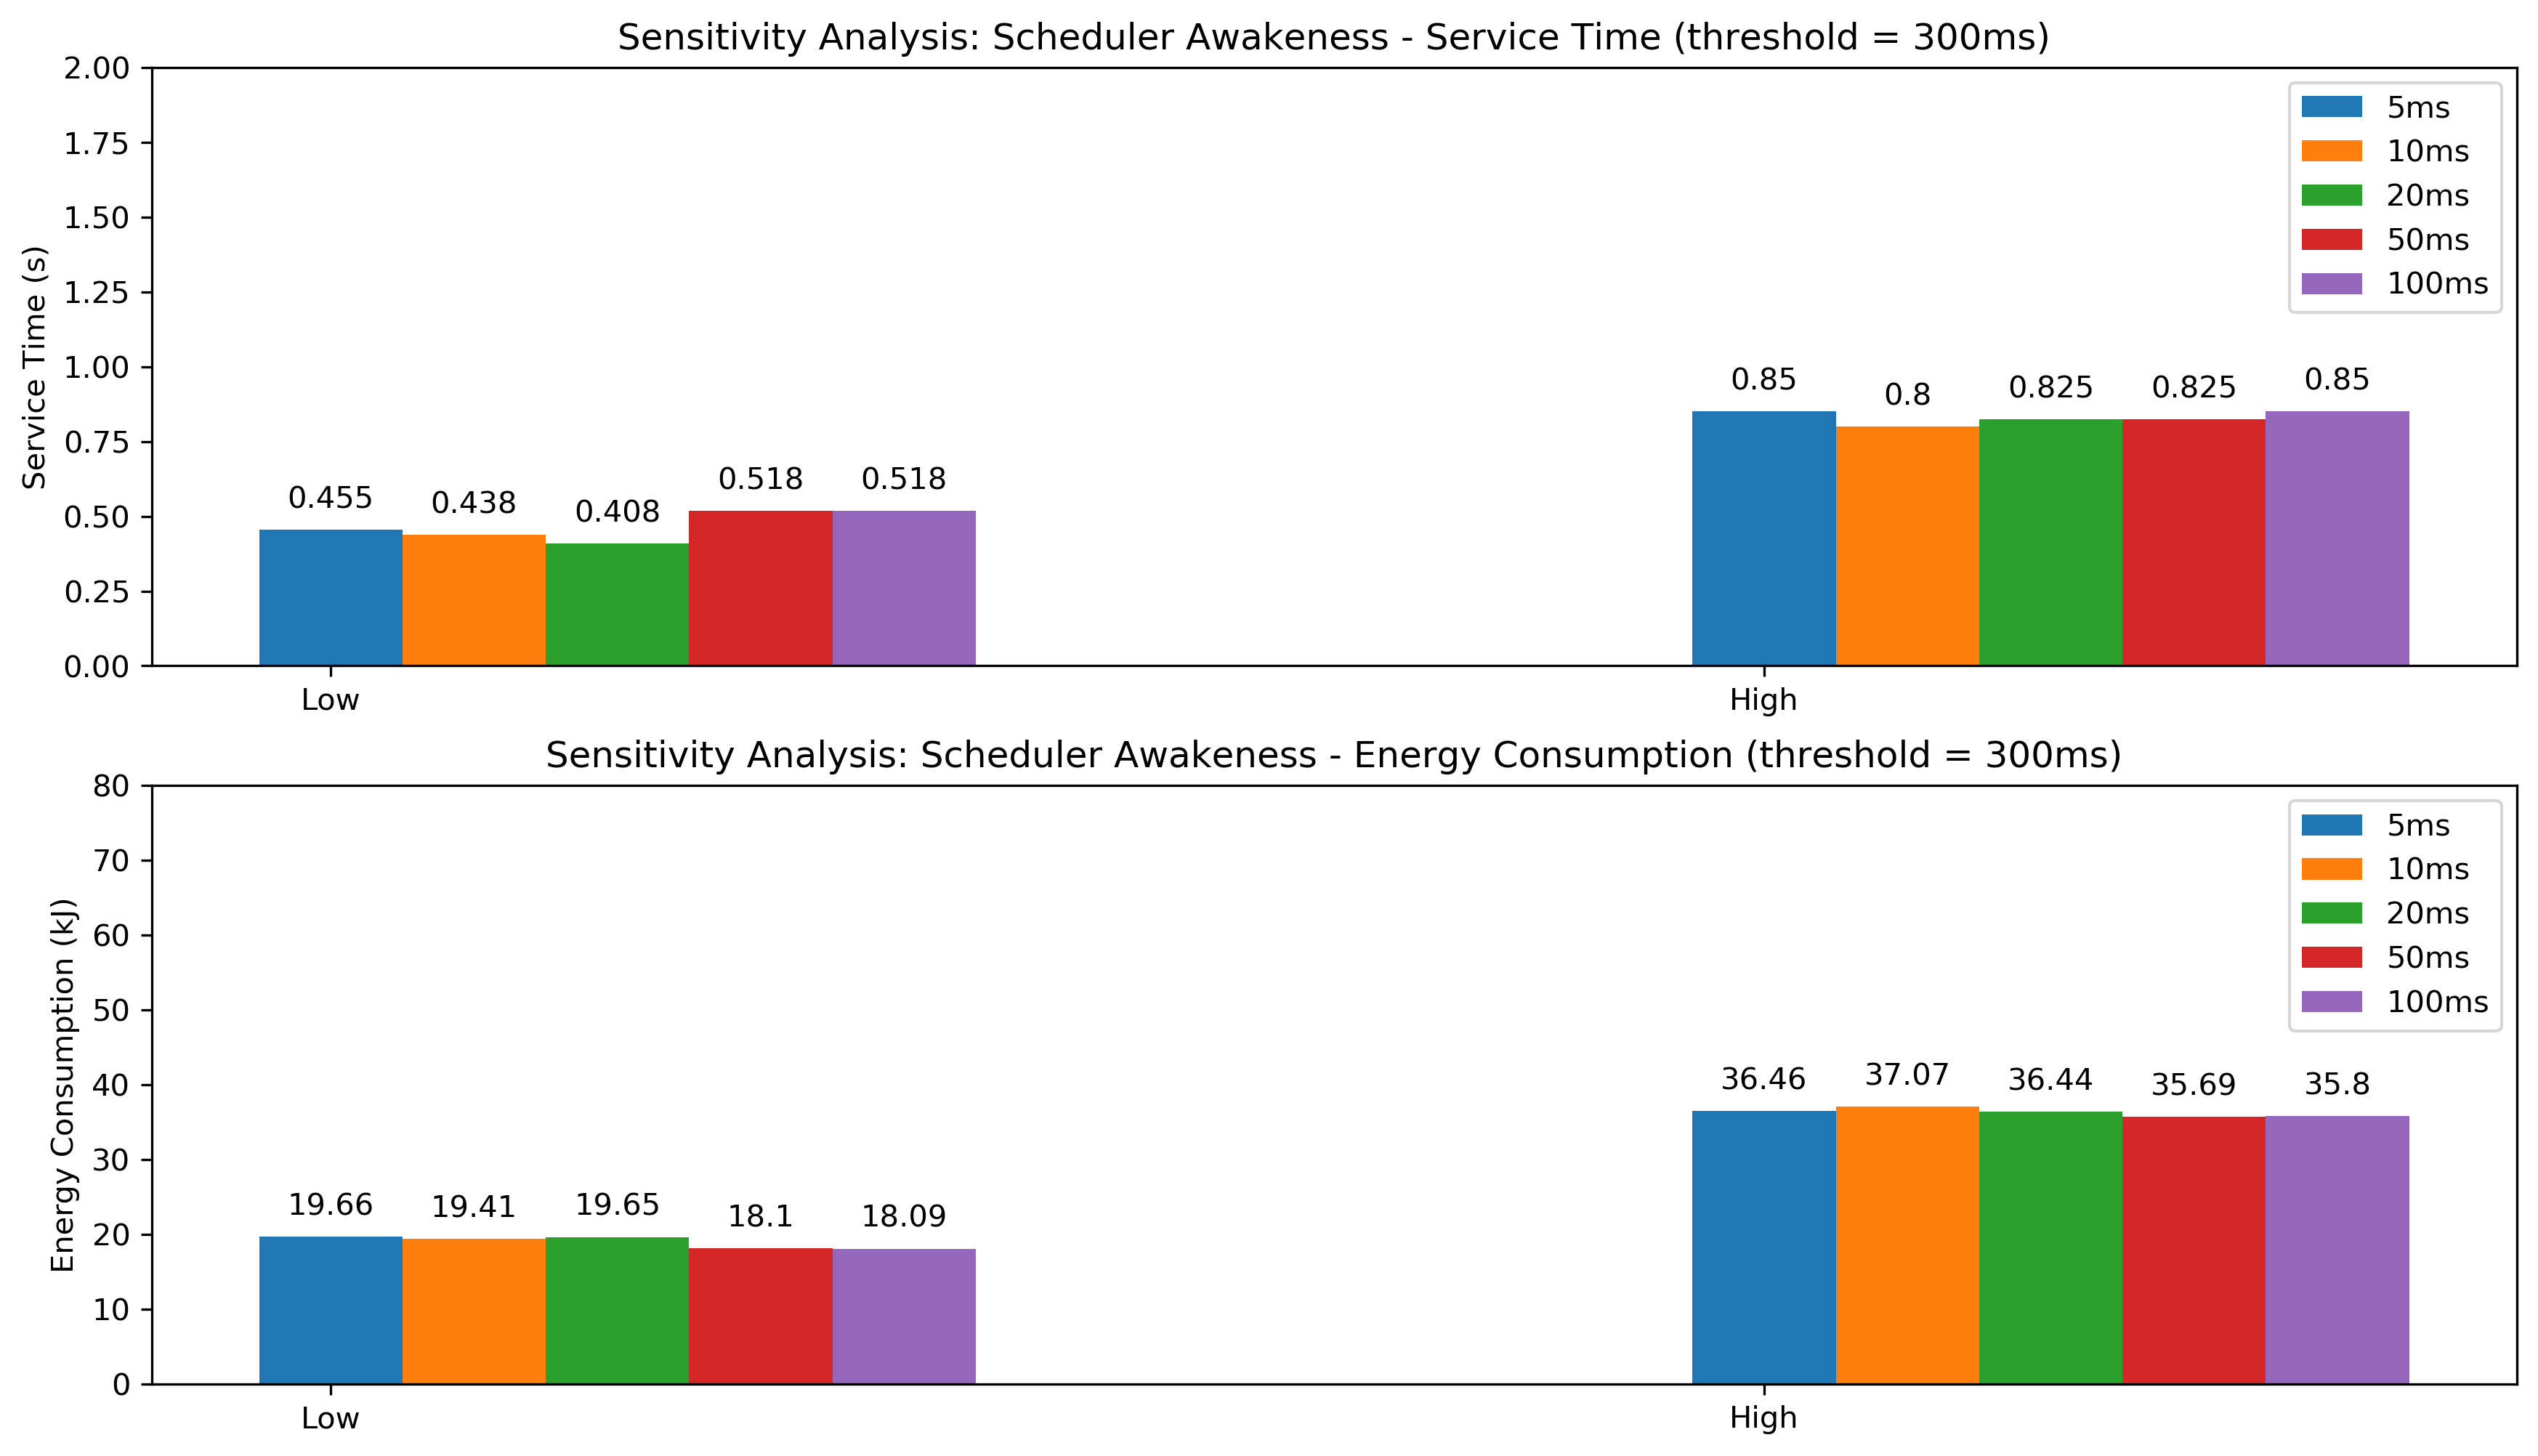

In [26]:
width = 0.1  # the width of the bars
labels=['Low', 'High']
#labels = ['Powersave', 'Performance', 'Ondemand', 'Hurryup']
x = np.arange(len(labels))

sleep5ms_mean = np.round([sleep5ms_low.mean(), sleep5ms_high.mean()],3)
sleep10ms_mean = np.round([thres300ms_low.mean(), thres300ms_high.mean()],3)
sleep20ms_mean = np.round([sleep20ms_low.mean(), sleep20ms_high.mean()],3)
sleep50ms_mean = np.round([sleep50ms_low.mean(), sleep50ms_high.mean()],3)
sleep100ms_mean = np.round([sleep100ms_low.mean(), sleep100ms_high.mean()],3)
sleep5ms_std = [sleep5ms_low.std(), sleep5ms_high.std()]
sleep10ms_std = [thres300ms_low.std(), thres300ms_high.std()]
sleep20ms_std = [sleep20ms_low.std(), sleep20ms_high.std()]
sleep50ms_std = [sleep50ms_low.std(), sleep50ms_high.std()]
sleep100ms_std = [sleep100ms_low.std(), sleep100ms_high.std()]


fig, axs = plt.subplots(2, 1, figsize=(14,8), dpi=300)
ax = axs[0]

r1 = np.arange(len(sleep5ms_mean))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]
r5 = [x + width for x in r4]

rects1 = ax.bar(r1, sleep5ms_mean, width, yerr=sleep5ms_std, label="5ms")
rects2 = ax.bar(r2, sleep10ms_mean, width, yerr=sleep10ms_std, label="10ms")
rects3 = ax.bar(r3, sleep20ms_mean, width, yerr=sleep20ms_std, label="20ms")
rects4 = ax.bar(r4, sleep50ms_mean, width, yerr=sleep50ms_std, label="50ms")
rects5 = ax.bar(r5, sleep100ms_mean, width, yerr=sleep100ms_std, label="100ms")


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Service Time (s)')
#ax.set_ylabel('Processor Frequency (GHz)')

ax.set_title('Sensitivity Analysis: Scheduler Awakeness - Service Time (threshold = 300ms)')
ax.set_xticks(x)
ax.set_ylim(0,2)
ax.set_xticklabels(labels)
ax.legend()



autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

ax = axs[1]


sleep5ms_mean_energy = np.round([sleep5ms_low_energy.mean(), sleep5ms_high_energy.mean()],3)
sleep10ms_mean_energy = np.round([thres300ms_low_energy.mean(), thres300ms_high_energy.mean()],3)
sleep20ms_mean_energy = np.round([sleep20ms_low_energy.mean(), sleep20ms_high_energy.mean()],3)
sleep50ms_mean_energy = np.round([sleep50ms_low_energy.mean(), sleep50ms_high_energy.mean()],3)
sleep100ms_mean_energy = np.round([sleep100ms_low_energy.mean(), sleep100ms_high_energy.mean()],3)
sleep5ms_std_energy = [sleep5ms_low_energy.std(), sleep5ms_high_energy.std()]
sleep10ms_std_energy = [thres300ms_low_energy.std(), thres300ms_high_energy.std()]
sleep20ms_std_energy = [sleep20ms_low_energy.std(), sleep20ms_high_energy.std()]
sleep50ms_std_energy = [sleep50ms_low_energy.std(), sleep50ms_high_energy.std()]
sleep100ms_std_energy = [sleep100ms_low_energy.std(), sleep100ms_high_energy.std()]


r1 = np.arange(len(twostates_20_energy_mean))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]
r5 = [x + width for x in r4]

rects1 = ax.bar(r1, sleep5ms_mean_energy, width, yerr=sleep5ms_std_energy, label="5ms")
rects2 = ax.bar(r2, sleep10ms_mean_energy, width, yerr=sleep10ms_std_energy, label="10ms")
rects3 = ax.bar(r3, sleep20ms_mean_energy, width, yerr=sleep20ms_std_energy, label="20ms")
rects4 = ax.bar(r4, sleep50ms_mean_energy, width, yerr=sleep50ms_std_energy, label="50ms")
rects5 = ax.bar(r5, sleep100ms_mean_energy, width, yerr=sleep100ms_std_energy, label="100ms")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Energy Consumption (kJ)')
#ax.set_ylabel('Processor Frequency (GHz)')

ax.set_title('Sensitivity Analysis: Scheduler Awakeness - Energy Consumption (threshold = 300ms)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)


ax.set_ylim(0,80)
#fig.tight_layout()

plt.show()
fig.savefig('D:\\elastic-hurryup\\graphs\\awakeness_sensitivity.png')

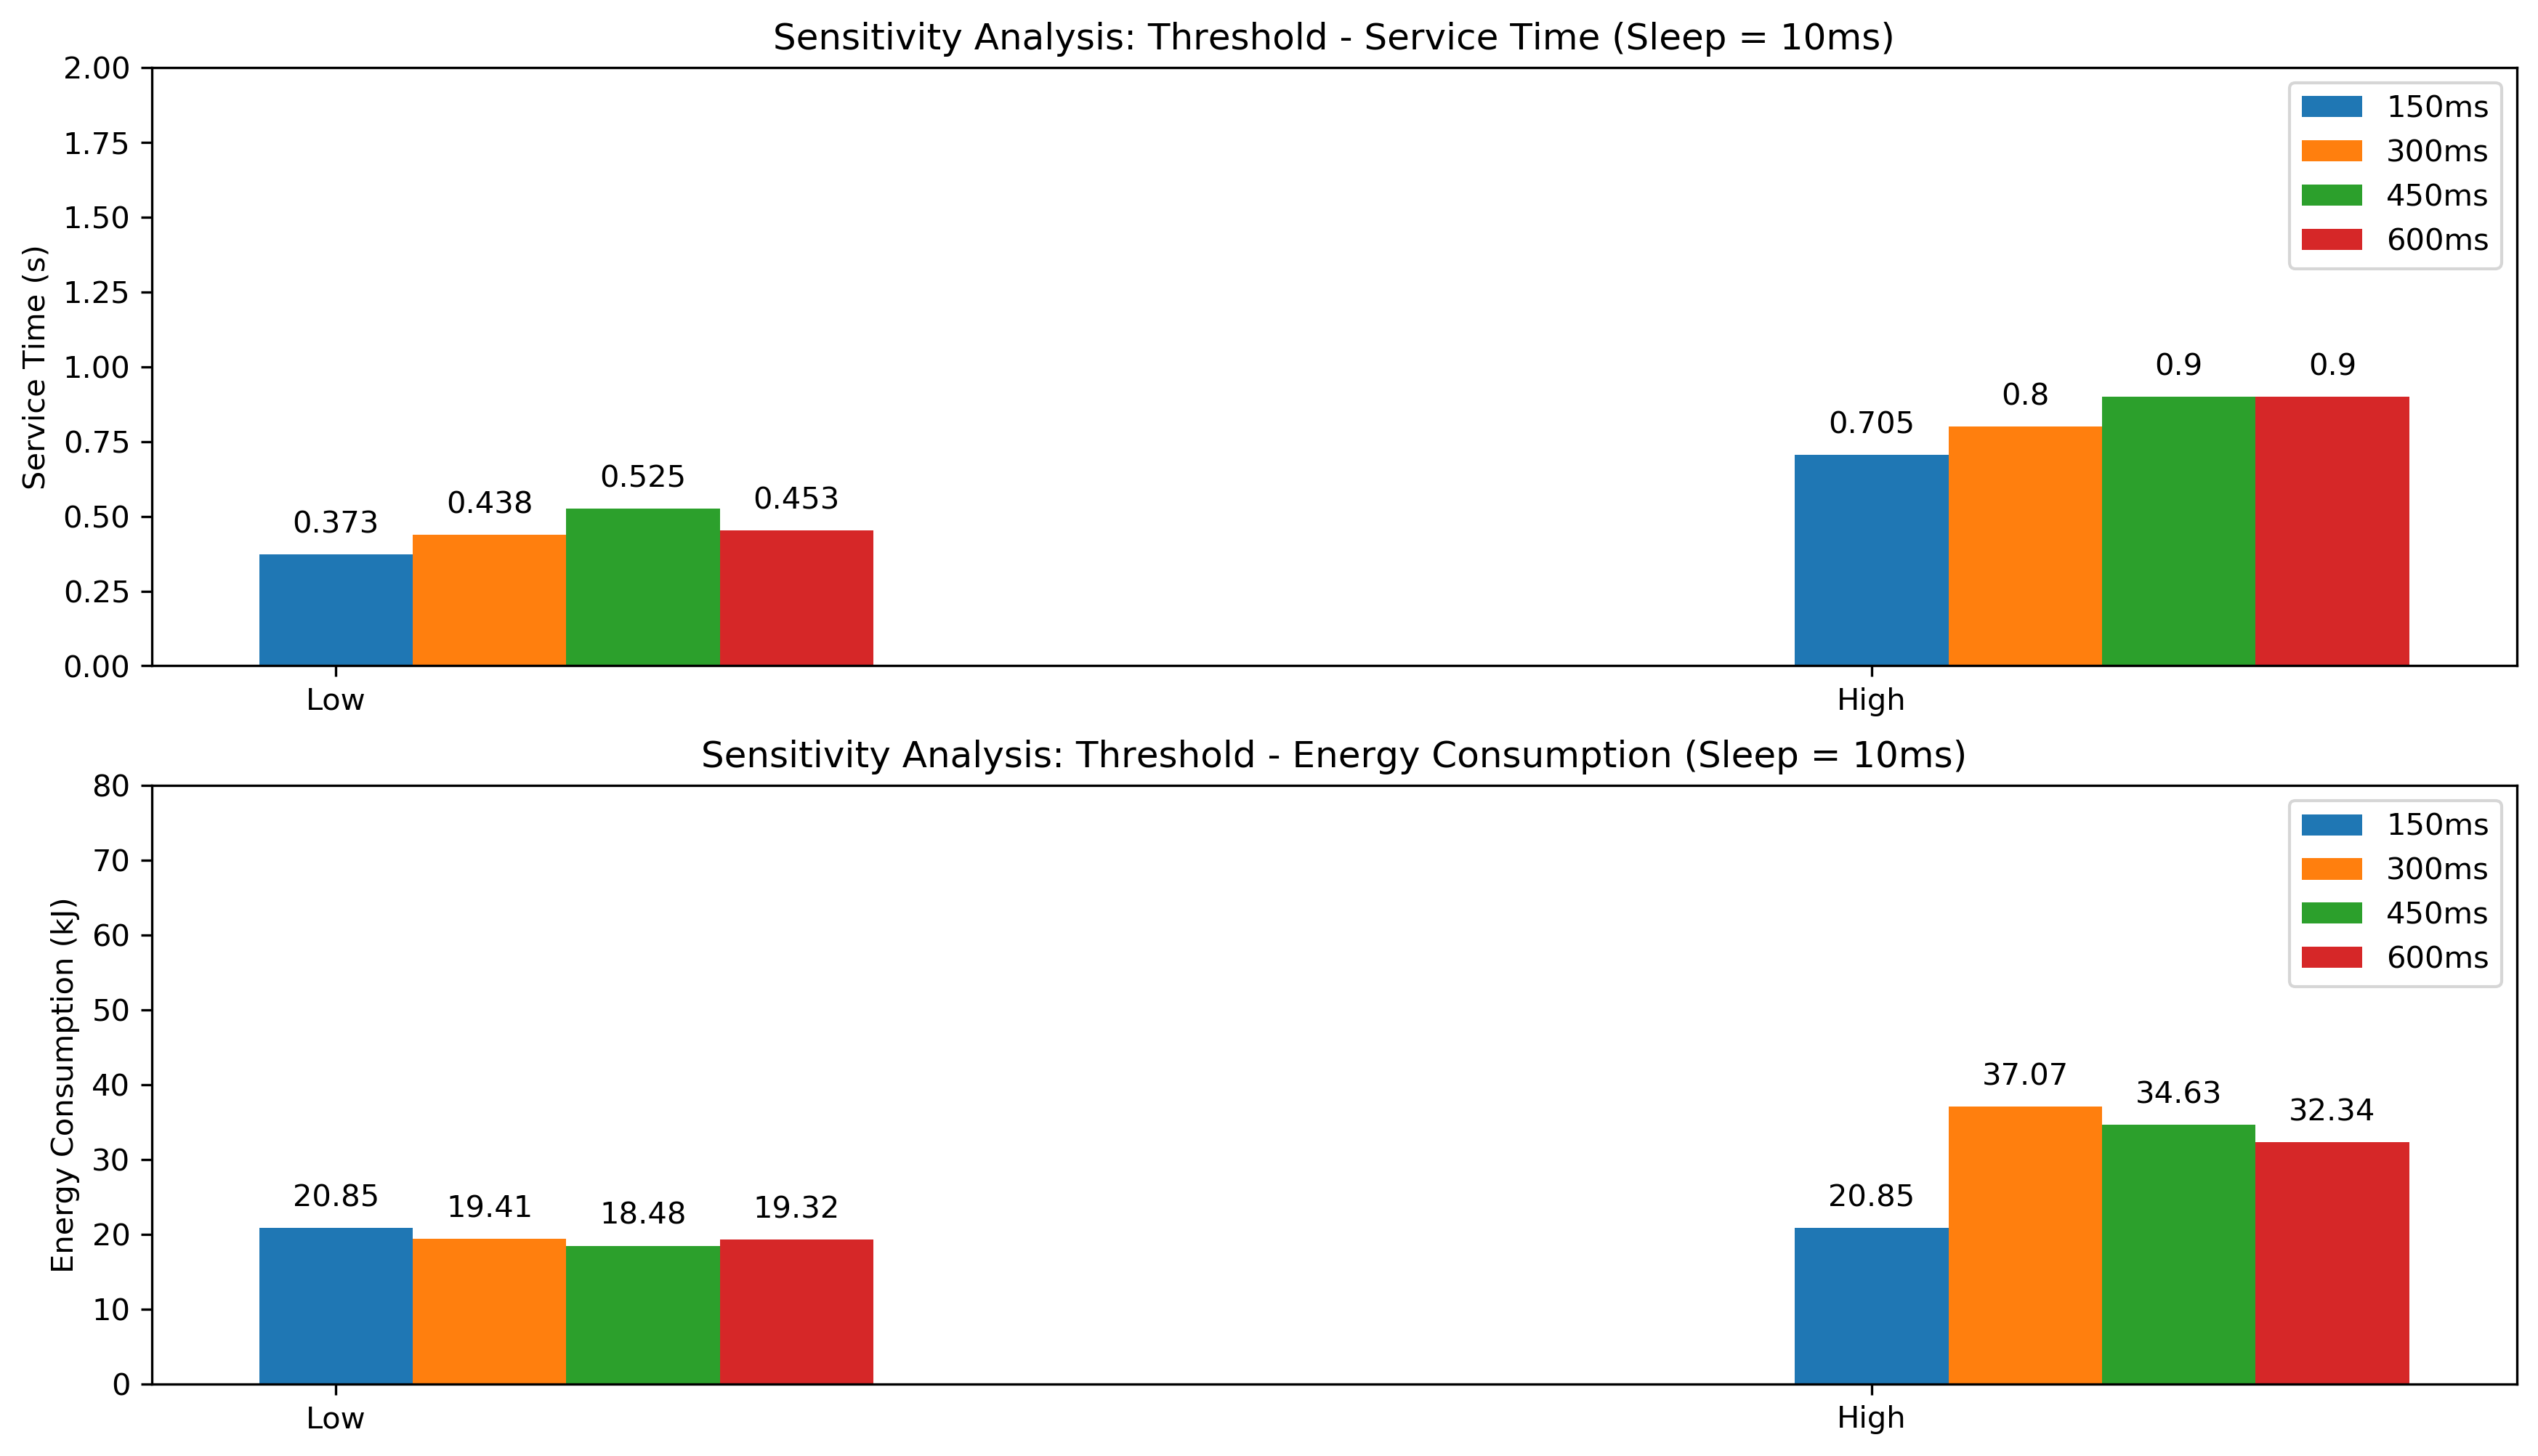

In [27]:
width = 0.1  # the width of the bars
labels=['Low', 'High']
#labels = ['Powersave', 'Performance', 'Ondemand', 'Hurryup']
x = np.arange(len(labels))

thres150ms_mean = np.round([thres150ms_low.mean(), thres150ms_high.mean()],3)
thres300ms_mean = np.round([thres300ms_low.mean(), thres300ms_high.mean()],3)
thres450ms_mean = np.round([thres450ms_low.mean(), thres450ms_high.mean()],3)
thres600ms_mean = np.round([thres600ms_low.mean(), thres600ms_high.mean()],3)
thres150ms_std = [thres150ms_low.std(), thres150ms_high.std()]
thres300ms_std = [thres300ms_low.std(), thres300ms_high.std()]
thres450ms_std = [thres450ms_low.std(), thres450ms_high.std()]
thres600ms_std = [thres600ms_low.std(), thres600ms_high.std()]


fig, axs = plt.subplots(2, 1, figsize=(14,8), dpi=300)
ax = axs[0]

r1 = np.arange(len(sleep5ms_mean))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]

rects1 = ax.bar(r1, thres150ms_mean, width, yerr=sleep5ms_std, label="150ms")
rects2 = ax.bar(r2, thres300ms_mean, width, yerr=sleep10ms_std, label="300ms")
rects3 = ax.bar(r3, thres450ms_mean, width, yerr=sleep20ms_std, label="450ms")
rects4 = ax.bar(r4, thres600ms_mean, width, yerr=sleep50ms_std, label="600ms")


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Service Time (s)')
#ax.set_ylabel('Processor Frequency (GHz)')

ax.set_title('Sensitivity Analysis: Threshold - Service Time (Sleep = 10ms)')
ax.set_xticks(x)
ax.set_ylim(0,2)
ax.set_xticklabels(labels)
ax.legend()



autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

ax = axs[1]

thres150ms_mean_energy = np.round([thres150ms_low_energy.mean(), thres150ms_high_energy.mean()],3)
thres300ms_mean_energy = np.round([thres300ms_low_energy.mean(), thres300ms_high_energy.mean()],3)
thres450ms_mean_energy = np.round([thres450ms_low_energy.mean(), thres450ms_high_energy.mean()],3)
thres600ms_mean_energy = np.round([thres600ms_low_energy.mean(), thres600ms_high_energy.mean()],3)
thres150ms_std_energy = [thres150ms_low_energy.std(), thres150ms_high_energy.std()]
thres300ms_std_energy = [thres300ms_low_energy.std(), thres300ms_high_energy.std()]
thres450ms_std_energy = [thres450ms_low_energy.std(), thres450ms_high_energy.std()]
thres600ms_std_energy = [thres600ms_low_energy.std(), thres600ms_high_energy.std()]

r1 = np.arange(len(twostates_20_energy_mean))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]

rects1 = ax.bar(r1, thres150ms_low_energy, width, yerr=sleep5ms_std_energy, label="150ms")
rects2 = ax.bar(r2, thres300ms_mean_energy, width, yerr=sleep10ms_std_energy, label="300ms")
rects3 = ax.bar(r3, thres450ms_mean_energy, width, yerr=sleep20ms_std_energy, label="450ms")
rects4 = ax.bar(r4, thres600ms_mean_energy, width, yerr=sleep50ms_std_energy, label="600ms")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Energy Consumption (kJ)')
#ax.set_ylabel('Processor Frequency (GHz)')

ax.set_title('Sensitivity Analysis: Threshold - Energy Consumption (Sleep = 10ms)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)


ax.set_ylim(0,80)
#fig.tight_layout()

plt.show()
fig.savefig('D:\\elastic-hurryup\\graphs\\threshold_sensitivity.png')

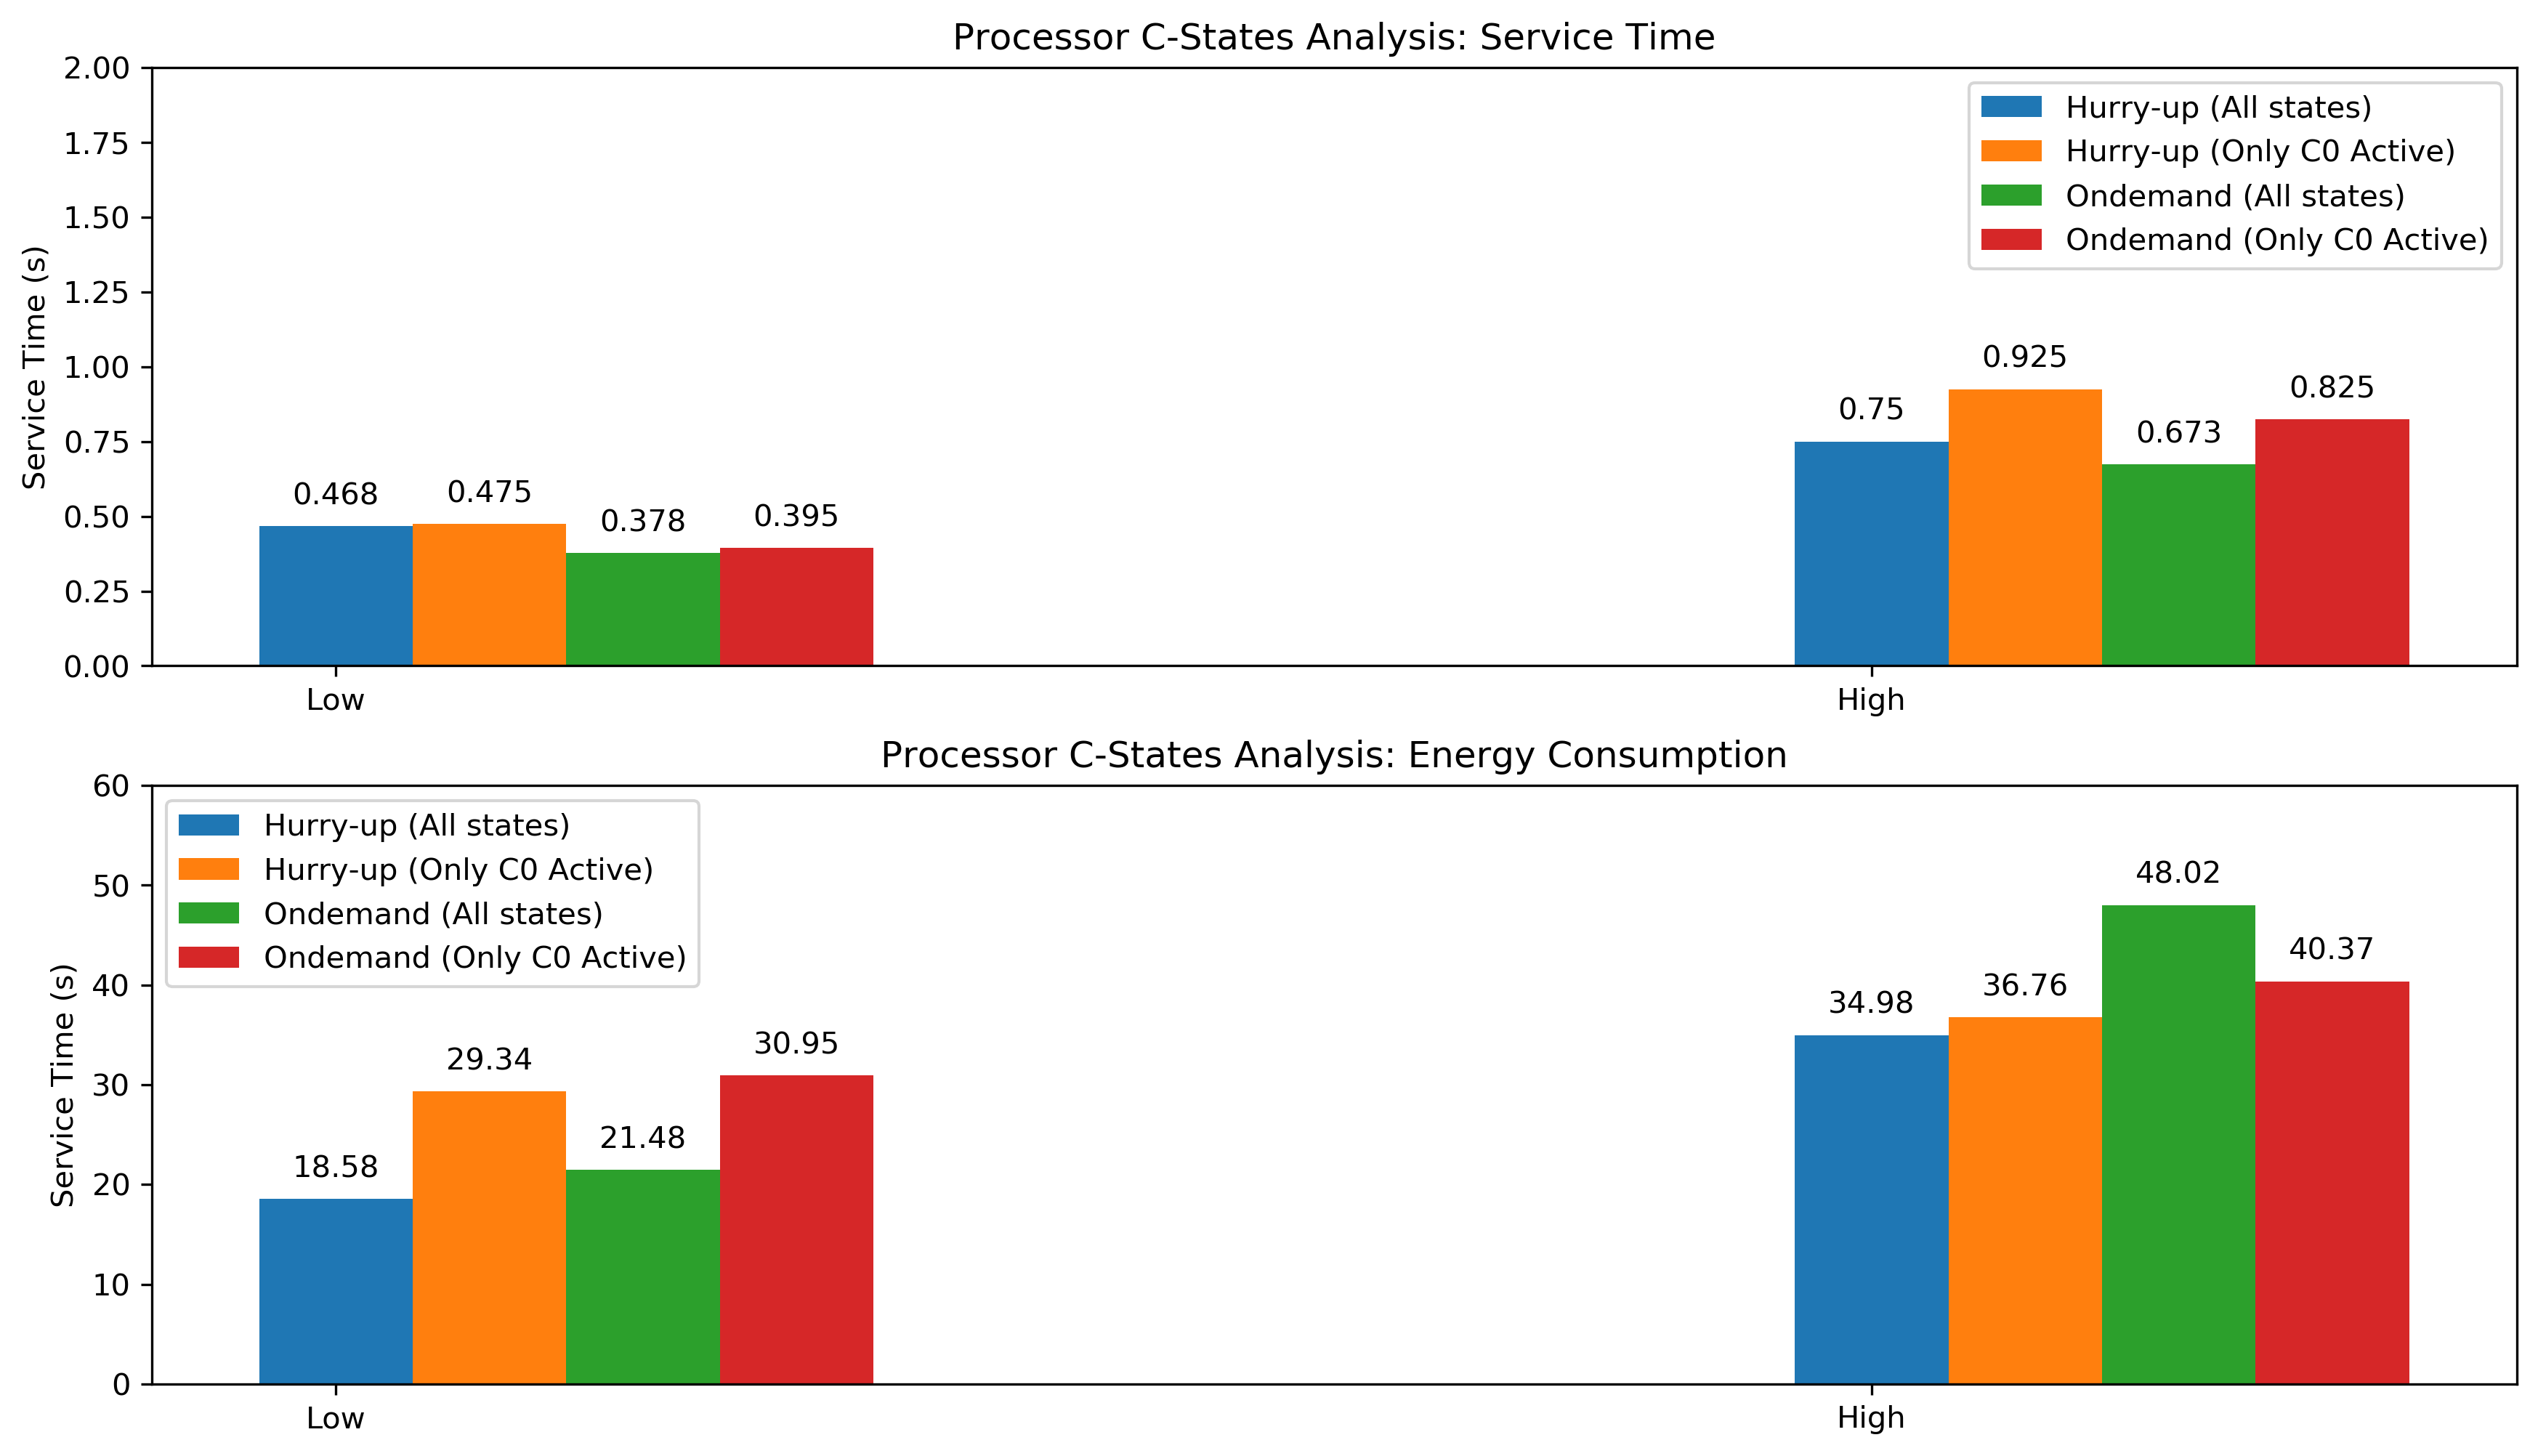

In [49]:
# C-States

width = 0.1  # the width of the bars
labels=['Low', 'High']
x = np.arange(len(labels))

fig, axs = plt.subplots(2, 1, figsize=(14,8), dpi=300)
ax = axs[0]

hup_allstates_low = np.array([ 0.468 ])
hup_allstates_low_energy = np.array([ 18.58 ])
hup_allstates_high = np.array([0.750])
hup_allstates_high_energy = np.array([34.98])

hup_c0_low = np.array([ 0.475 ])
hup_c0_low_energy = np.array([ 29.34 ])
hup_c0_high = np.array([ 0.925 ])
hup_c0_high_energy = np.array([ 36.76 ])

ondemand_allstates_low = np.array([0.378])
ondemand_allstates_low_energy = np.array([21.48])
ondemand_allstates_high = np.array([0.673])
ondemand_allstates_high_energy = np.array([48.02])

ondemand_c0_low = np.array([0.395])
ondemand_c0_low_energy = np.array([30.95])
ondemand_c0_high = np.array([0.825])
ondemand_c0_high_energy = np.array([ 40.37 ])

hup_allstates_mean = np.round([hup_allstates_low.mean(), hup_allstates_high.mean()],3)
hup_c0_mean = np.round([hup_c0_low.mean(), hup_c0_high.mean()],3)
ondemand_allstates_mean = np.round([ondemand_allstates_low.mean(), ondemand_allstates_high.mean()],3)
ondemand_c0_mean = np.round([ondemand_c0_low.mean(), ondemand_c0_high.mean()],3)
hup_allstates_mean_energy = np.round([hup_allstates_low_energy.mean(), hup_allstates_high_energy.mean()],3)
hup_c0_mean_energy = np.round([hup_c0_low_energy.mean(), hup_c0_high_energy.mean()],3)
ondemand_allstates_mean_energy = np.round([ondemand_allstates_low_energy.mean(), ondemand_allstates_high_energy.mean()],3)
ondemand_c0_mean_energy = np.round([ondemand_c0_low_energy.mean(), ondemand_c0_high_energy.mean()],3)

r1 = np.arange(len(sleep5ms_mean))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]

rects1 = ax.bar(r1, hup_allstates_mean, width, yerr=sleep5ms_std, label="Hurry-up (All states)")
rects2 = ax.bar(r2, hup_c0_mean, width, yerr=sleep10ms_std, label="Hurry-up (Only C0 Active)")
rects3 = ax.bar(r3, ondemand_allstates_mean, width, yerr=sleep20ms_std, label="Ondemand (All states)")
rects4 = ax.bar(r4, ondemand_c0_mean, width, yerr=sleep50ms_std, label="Ondemand (Only C0 Active)")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Service Time (s)')
#ax.set_ylabel('Processor Frequency (GHz)')

ax.set_title('Processor C-States Analysis: Service Time')
ax.set_xticks(x)
ax.set_ylim(0,2)
ax.set_xticklabels(labels)
ax.legend()


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

ax = axs[1]

rects1 = ax.bar(r1, hup_allstates_mean_energy, width, label="Hurry-up (All states)")
rects2 = ax.bar(r2, hup_c0_mean_energy, width, label="Hurry-up (Only C0 Active)")
rects3 = ax.bar(r3, ondemand_allstates_mean_energy, width, label="Ondemand (All states)")
rects4 = ax.bar(r4, ondemand_c0_mean_energy, width, label="Ondemand (Only C0 Active)")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Service Time (s)')
#ax.set_ylabel('Processor Frequency (GHz)')

ax.set_title('Processor C-States Analysis: Energy Consumption')
ax.set_xticks(x)
ax.set_ylim(0,60)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()
fig.savefig('D:\\elastic-hurryup\\graphs\\c-states_service_energy.png')

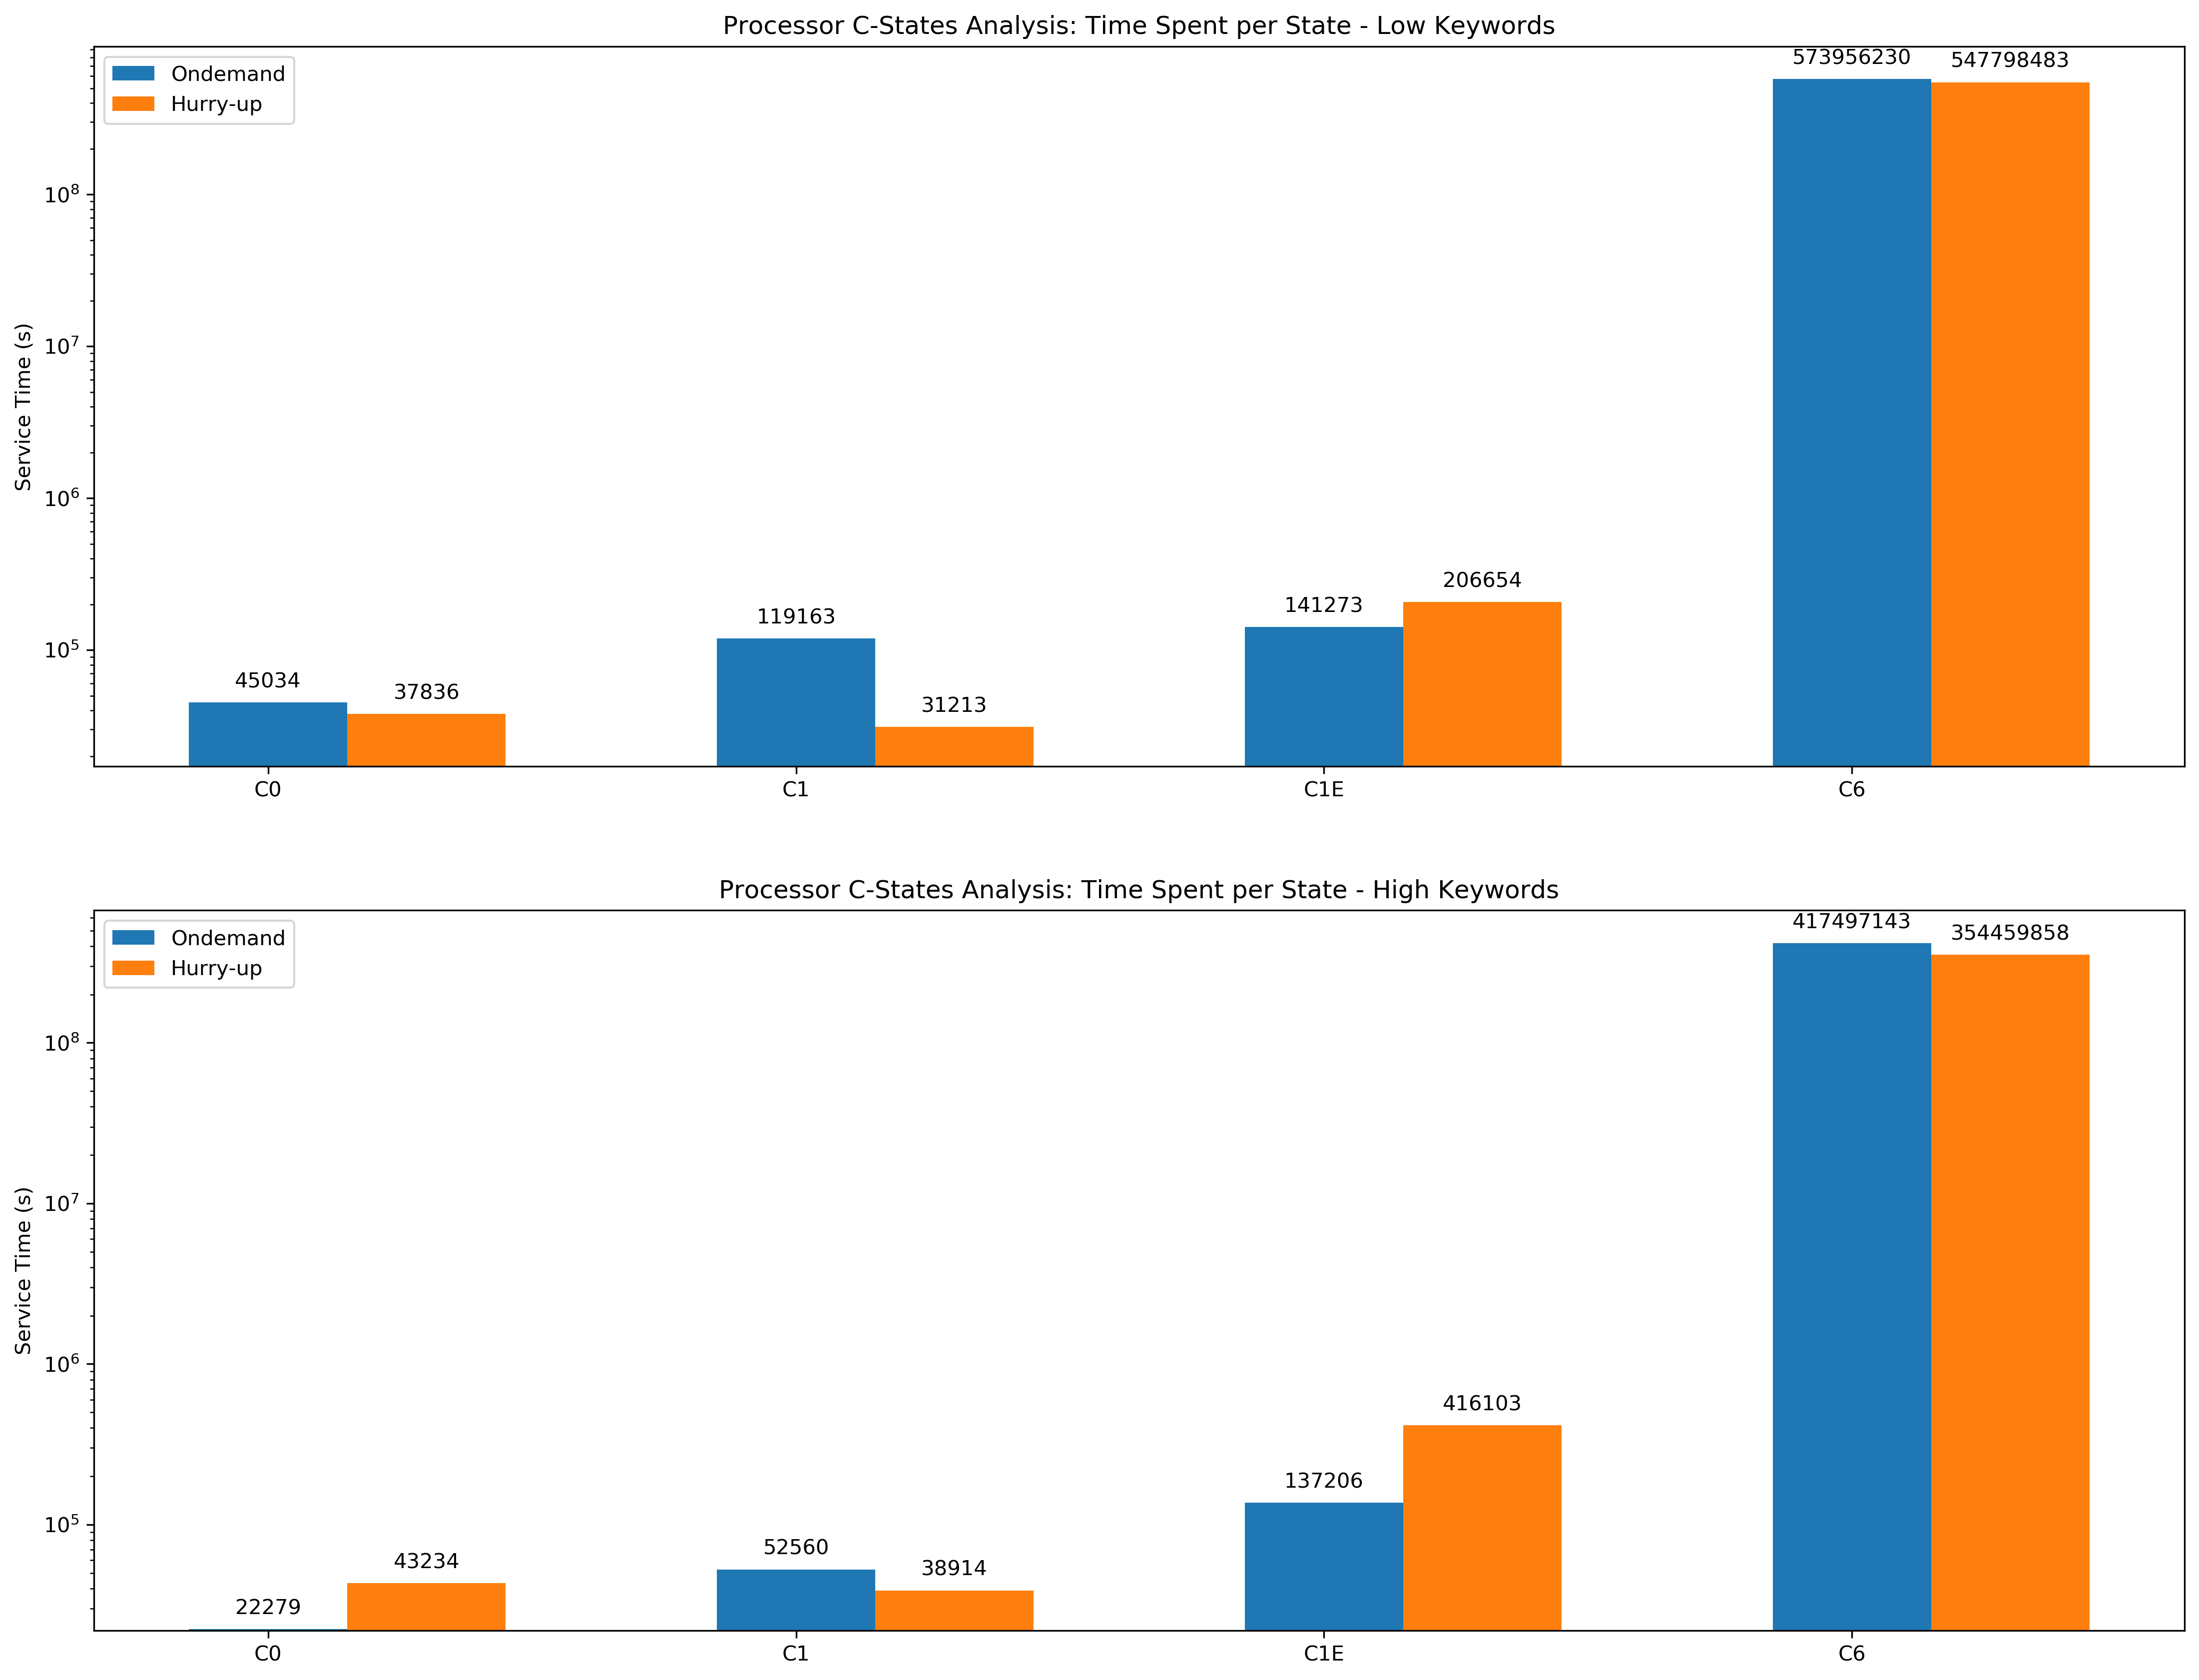

In [50]:
ondem_states_low = np.array([ 45034, 119163, 141273, 573956230])
ondem_states_high = np.array([ 22279, 52560, 137206, 417497143])
hup_states_low = np.array([37836, 31213, 206654, 547798483])
hup_states_high = np.array([43234, 38914, 416103, 354459858])


width = 0.3  # the width of the bars
labels=['C0', 'C1', 'C1E', 'C6']
x = np.arange(len(labels))

fig, axs = plt.subplots(2, 1, figsize=(18,14), dpi=300)

ax = axs[0]
ax.set_yscale('log')
r1 = np.arange(len(ondem_states_low))
r2 = [x + width for x in r1]

rects1 = ax.bar(r1, ondem_states_low, width, label="Ondemand")
rects2 = ax.bar(r2, hup_states_low, width, label="Hurry-up")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Service Time (s)')
#ax.set_ylabel('Processor Frequency (GHz)')

ax.set_title('Processor C-States Analysis: Time Spent per State - Low Keywords')
ax.set_xticks(x)
#ax.set_ylim(0,600000000)
ax.set_xticklabels(labels)
ax.legend()


autolabel(rects1)
autolabel(rects2)

ax = axs[1]
ax.set_yscale('log')
r1 = np.arange(len(ondem_states_low))
r2 = [x + width for x in r1]

rects1 = ax.bar(r1, ondem_states_high, width, label="Ondemand")
rects2 = ax.bar(r2, hup_states_high, width, label="Hurry-up")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Service Time (s)')
#ax.set_ylabel('Processor Frequency (GHz)')

ax.set_title('Processor C-States Analysis: Time Spent per State - High Keywords')
ax.set_xticks(x)
#ax.set_ylim(0,600000000)
ax.set_xticklabels(labels)
ax.legend()


autolabel(rects1)
autolabel(rects2)
plt.show()
fig.savefig('D:\\elastic-hurryup\\graphs\\c-states_calls.png')